In [952]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import sys
import os
import regex as re
from pandas.tseries.offsets import *

import sqlite3


pd.set_option('max_columns', 163)
pd.set_option('max_rows', 100)

# A. Data import and high level exploration
First, you will download the data and do some exploratory data analysis (EDA).

Download: Get the data from the Kaggle link provided and import it into Pandas. The dataset should include 356'027 samples and 163 columns.

Exploratory data analysis: The goal at this stage is to get familiar with the data and create an overview of it using Python code. Keep in mind that the table has 163 columns which means that you will need to search for the interesting columns and focus on exploring them. There are many strategies to handle this part and several solutions will be accepted, but here are some ideas to help find interesting columns and explore their content:

- What is the proportion of missing values per column/row? Should you keep, fill or remove these missing values? What would be the implications?
- What are the different columns data types?
- What are the mean/min/max/median values of numerical columns? Do you spot any issue from analyzing those statistics? ex. a negative amount of sugar, a maximum value extremely far from the 75% percentile (outlier?)
- For numerical columns, how does the variable distribution look like? ex. using histograms or scatter/violin/density plots
- Are there columns that contain lists? ex. lists of ingredients, tags
- Are there columns that are very similar in their content?
- Are columns with text always written using the same alphabet?
- For categorical columns, what are the top 10 most frequent values?
- Are there duplicate products?

Right after, in task B, we will ask you to answer 3 research questions. The exploratory data analysis (EDA) questions from above will help you get a high-level understanding of the data set and help you find/design 3 research questions that you're interested in and that seem feasible.

To answer those 3 research questions, you will very likely only need to analyze a subset of the 163 columns! Identify those columns and clean them as much as necessary to get reasonable results. But remember to stay pragmatic about your cleaning. If something influences the accuracy and reliability of your results, consider changing it. Otherwise, it is good to acknowledge, comment and move on.



In [953]:
# read flat file
raw = pd.read_csv("en.openfoodfacts.org.products.tsv", sep = '\t')

# or else:
#    df1 = pd.read_csv("en.openfoodfacts.org.products.tsv", dialect = 'excel-tab')

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [954]:
data = raw.copy()

I start exploting the data frame.
Since it has a large amount of columns and rows, I expand the output display to see more rows and columns

In [955]:
data.shape

(356027, 163)

In [956]:
data.iloc[:,[0,3,5]].dtypes

code               object
created_t          object
last_modified_t    object
dtype: object

I check the columns with mixed data types

In [957]:
for i in [0,3,5,19,20,24,25,26,27,28,36,37,38,39,48]:
 print(i, set(map(type, data.iloc[:,i])))

0 {<class 'int'>, <class 'float'>, <class 'str'>}
3 {<class 'int'>, <class 'float'>, <class 'str'>}
5 {<class 'int'>, <class 'str'>}
19 {<class 'float'>, <class 'str'>}
20 {<class 'float'>, <class 'str'>}
24 {<class 'float'>, <class 'str'>}
25 {<class 'float'>, <class 'str'>}
26 {<class 'float'>, <class 'str'>}
27 {<class 'float'>, <class 'str'>}
28 {<class 'float'>, <class 'str'>}
36 {<class 'float'>, <class 'str'>}
37 {<class 'float'>, <class 'str'>}
38 {<class 'float'>, <class 'str'>}
39 {<class 'float'>, <class 'str'>}
48 {<class 'float'>, <class 'str'>}


In [958]:
data.iloc[:, [0,3,5,19,20,24,25,26,27,28,36,37,38,39,48]].tail()

,code,created_t,last_modified_t,manufacturing_places,manufacturing_places_tags,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,allergens_en,traces,traces_tags,traces_en,ingredients_from_palm_oil_tags
356022,99567453,1489059076,1491244499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356023,9970229501521,1422099377,1491244499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,1497018549,1500730305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,1492340089,1492340089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356026,999990026839,1489072709,1491244499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [959]:
cols_mixed_types = data.iloc[:,[0,3,5,19,20,24,25,26,27,28,36,37,38,39,48]].columns

I observe that there are many columns with missing values. So I will handle the missing values and then check the columns with mixed data types for the remaining columns. I save them in a list to deal with them later.

In [960]:
cols_mixed_types.to_list()

['code',
 'created_t',
 'last_modified_t',
 'manufacturing_places',
 'manufacturing_places_tags',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'ingredients_from_palm_oil_tags']

In [961]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [962]:
data.memory_usage()

Index                          128
code                       2848216
url                        2848216
creator                    2848216
created_t                  2848216
                            ...   
carbon-footprint_100g      2848216
nutrition-score-fr_100g    2848216
nutrition-score-uk_100g    2848216
glycemic-index_100g        2848216
water-hardness_100g        2848216
Length: 164, dtype: int64

In [963]:
data.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object

In [964]:
data.iloc[0:5, [0,3,5,19,20,24]]

,code,created_t,last_modified_t,manufacturing_places,manufacturing_places_tags,emb_codes
0,3087,1474103866,1474103893,NaN,NaN,NaN
1,4530,1489069957,1489069957,NaN,NaN,NaN
2,4559,1489069957,1489069957,NaN,NaN,NaN
3,16087,1489055731,1489055731,NaN,NaN,NaN
4,16094,1489055653,1489055653,NaN,NaN,NaN


I start exploting the data frame. Since it has a large amount of columns and rows, I expand the output display to see more rows and columns

In [965]:
pd.options.display.max_columns

163

In [966]:
pd.options.display.max_rows

100

In [967]:
pd.set_option('max_columns', 163)
pd.set_option('max_rows', 100)

In [968]:
pd.get_option('max_columns')

163

In [969]:
pd.get_option('max_rows')

100

In [970]:
data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

In [971]:
data.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
121445,634660157738,http://world-en.openfoodfacts.org/product/0634...,usda-ndb-import,1489079764,2017-03-09T17:16:04Z,1489079764,2017-03-09T17:16:04Z,Cheese Curds,NaN,NaN,NaN,NaN,Wilmot Farms,wilmot-farms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Pasteurized milk, cheese cultures, enzymes, sa...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ pasteurized-milk -> en:pasteurized-milk ] ...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,1644.0,NaN,28.57,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.107,3.57,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.00,NaN,NaN,NaN,1.54178,0.607000,NaN,0.000429,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN
351742,8853662005027,http://world-en.openfoodfacts.org/product/8853...,kiliweb,1494240630,2017-05-08T10:50:30Z,1494240632,2017-05-08T10:50:32Z,Reis Nudeln,NaN,NaN,NaN,NaN,Exotic food,exotic-food,NaN,NaN,NaN,NaN,NaN,

In [972]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


In [973]:
data.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,283867.0,1.876851,2.501022e+00,0.00000,0.000000,1.000,3.000,3.000000e+01
ingredients_from_palm_oil_n,283867.0,0.023430,1.530938e-01,0.00000,0.000000,0.000,0.000,2.000000e+00
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,283867.0,0.059736,2.806595e-01,0.00000,0.000000,0.000,0.000,6.000000e+00
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,295367.0,1125.453320,9.368260e+02,0.00000,382.000000,1092.000,1674.000,2.311990e+05
energy-from-fat_100g,869.0,587.216617,7.132557e+02,0.00000,49.400000,300.000,900.000,3.830000e+03
fat_100g,279497.0,56065.871771,2.963385e+07,0.00000,0.100000,5.290,20.000,1.566667e+10


In [974]:
data.index

RangeIndex(start=0, stop=356027, step=1)

In [975]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [976]:
data.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

### 1| Missing values

We observe a lot of missing values. I want to see the propposrtion of missing values per columns/row.

In [977]:
(data.isnull().mean().round(3)*100).sort_values(ascending = False).head(60)

water-hardness_100g                      100.0
-sucrose_100g                            100.0
-mead-acid_100g                          100.0
-erucic-acid_100g                        100.0
-nervonic-acid_100g                      100.0
-capric-acid_100g                        100.0
-caprylic-acid_100g                      100.0
-caproic-acid_100g                       100.0
-butyric-acid_100g                       100.0
-glucose_100g                            100.0
beta-carotene_100g                       100.0
-fructose_100g                           100.0
-maltose_100g                            100.0
-maltodextrins_100g                      100.0
nutrition_grade_uk                       100.0
casein_100g                              100.0
serum-proteins_100g                      100.0
nucleotides_100g                         100.0
-gondoic-acid_100g                       100.0
-elaidic-acid_100g                       100.0
-oleic-acid_100g                         100.0
omega-9-fat_1

there are a lot of columns with 100% missing values that can be droped (no information provided)
There seem to be also other columns with a high percentage of missing values. Let's visualize this with a heatmap.

In [978]:
import seaborn as sns

In [979]:
colors = ['#000099', '#ffff00']
# yellow for the missing values, blue for the nonmissing

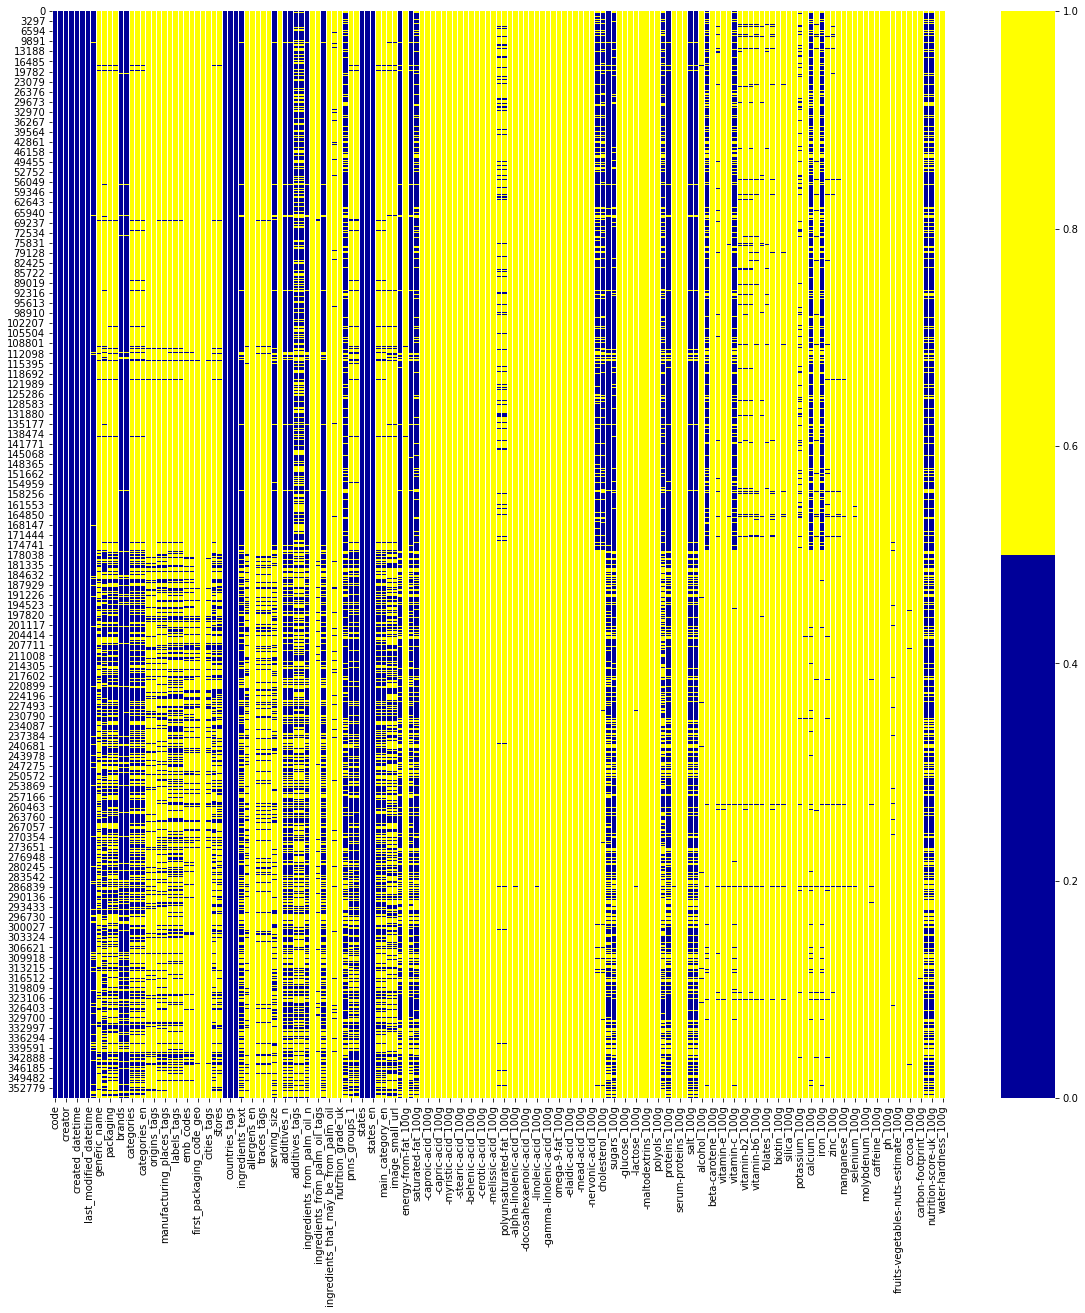

In [980]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(data.isnull(), cmap = sns.color_palette(colors))

I observe that there are many columns with very few non-missing values. In a first screeshot they can be removed since they do not add any information content.

In [981]:
data.shape

(356027, 163)

I define a function that returns the columns that have more than a certain percentage e.g. 80% missing values

In [982]:
def cols_with_missing(data, percentage):
    df = (data.isnull().mean().round(3)*100).to_frame()
    df.reset_index(inplace = True)
    df.columns = ['column_names', 'percentage']
    cols_to_drop = df.loc[df.percentage > percentage]['column_names'].to_list()
    return cols_to_drop

In [983]:
columns_to_drop = []
percentage = 80.0
columns_to_drop = cols_with_missing(data, percentage)

In [984]:
len(columns_to_drop)

109

columns_to_drop is a list with all the names of the columns that have more than 80% of missing values. Now I will drop all these 109 columns.

In [985]:
df = data.drop(columns_to_drop, axis = 1)

In [986]:
df.shape

(356027, 54)

In [987]:
163-109

54

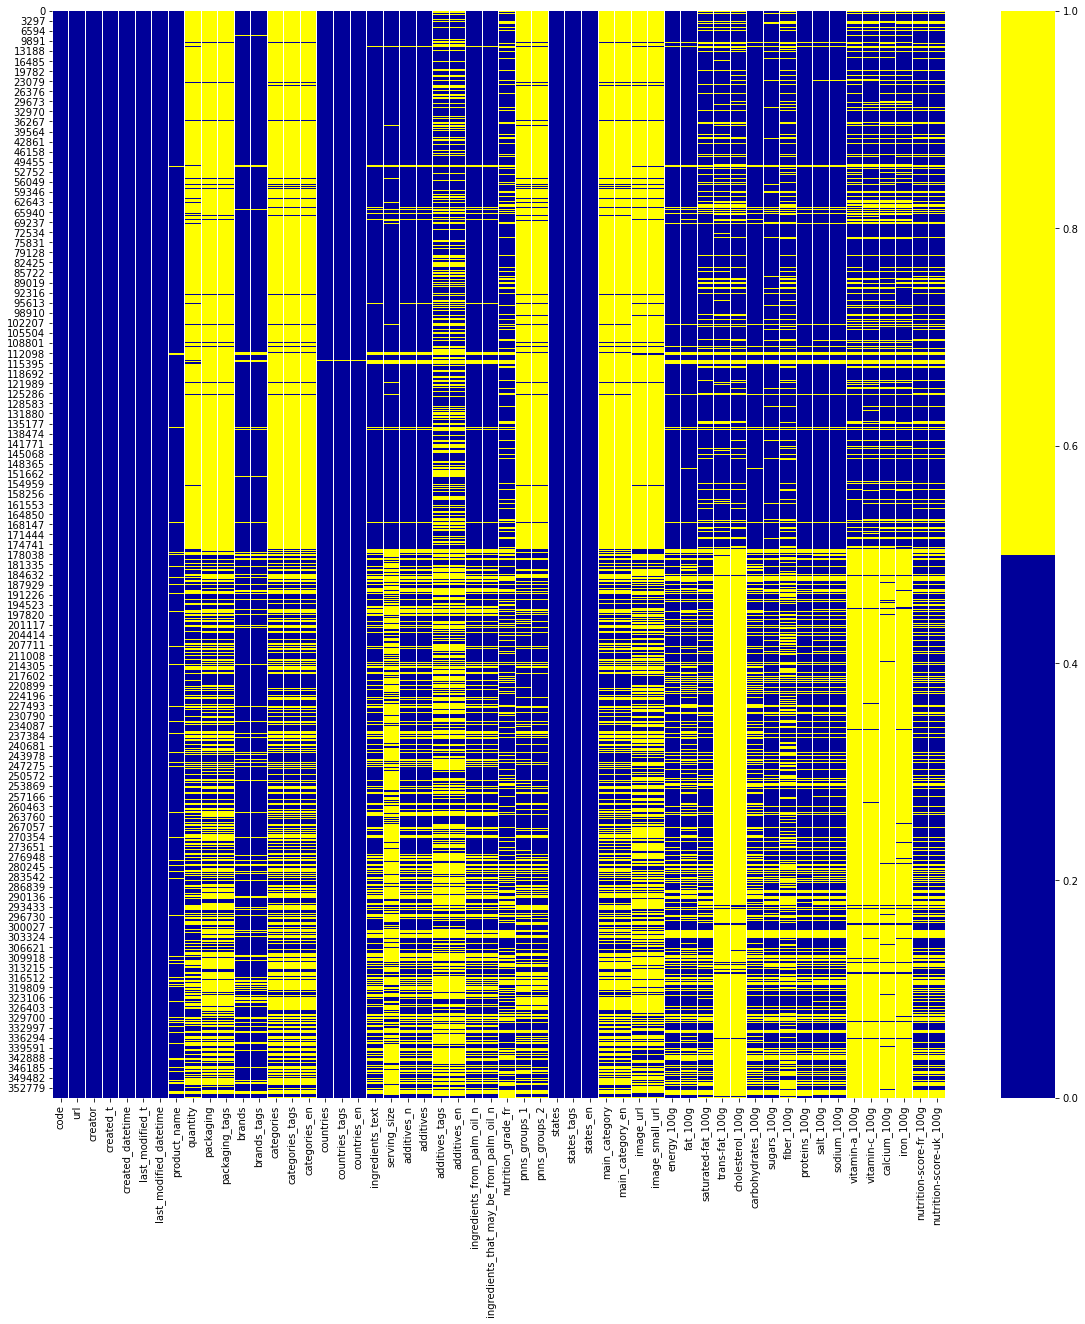

In [988]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df.isnull(), cmap = sns.color_palette(colors))

I observe that the distribution of the missing values per row changes around half of the dataset. Maybe this dataset is a product of merging two datasets. Depending on the variables I will choose to analyse, I may need half of the dataset. It seems that it doesn't make sense to remove any rows.

Now I want to see the percentage of missing values per row.

In [989]:
df.apply(lambda x: x.count(), axis = 1)

0         17
1         38
2         40
3         36
4         27
          ..
356022    42
356023    28
356024    19
356025    17
356026    33
Length: 356027, dtype: int64

In [990]:
df.head(1).T.isna().sum()

0    37
dtype: int64

In [991]:
df.head(1).T.count()

0    17
dtype: int64

the percentage of missing values per row is given by:

In [992]:
na_per_row= df.apply(lambda x: (1-x.count()/len(x))*100, axis = 1)

In [993]:
na_per_row.head()

0    68.518519
1    29.629630
2    25.925926
3    33.333333
4    50.000000
dtype: float64

In [994]:
na_per_row.sort_values(ascending = False).head(10)

337113    81.481481
240957    81.481481
177184    81.481481
333737    81.481481
279027    81.481481
293706    81.481481
230118    81.481481
206386    81.481481
312023    81.481481
311932    79.629630
dtype: float64

I will drop the rows if all of the values in the row are missing (I expect not find one, max 81%) but it is a good practice to check.

In [995]:
df.dropna(how = 'all', inplace = True)

In [996]:
df.shape[0] - df['product_name'].count()

17512

In [997]:
df['product_name'].value_counts()

Ice Cream                                    411
Extra Virgin Olive Oil                       303
Potato Chips                                 281
Premium Ice Cream                            226
Tomato Ketchup                               190
                                            ... 
Cuban Black Bean Soup                          1
Pizza Jalapeno Poppers                         1
High Protein + Fiber Bars                      1
Plat à l'italienne avec des pâtes              1
Chocolate negro extrafino con edulcorante      1
Name: product_name, Length: 249245, dtype: int64

In [998]:
df.shape[0]

356027

In [999]:
df['product_name'].count()

338515

In [1000]:
df['product_name'].isnull().sum()

17512

In [1001]:
df['code'].isnull().sum()

26

There are 17512 rows in which the product_name is missing. Consequently, I will drop the rows if the column 'product_name' is missing, because all the information in this dataframe refers to product. I will also drop the 19 rows with missing values on 'code'. A valid product has a name and a code.

In [1002]:
df.shape

(356027, 54)

In [1003]:
df.dropna(how = 'any', subset = ['product_name', 'code'],inplace = True)

# If I drop one column it does not play a role whether it is 'any' of 'all'
# or df.dropna(how = 'any', subset = ['product_name'], inplace = True) will give the same result with
# df.dropna(how = 'all', subset = ['product_name'], inplace = True)
# df = df.dropna(how = 'any', subset = ['product_name'])



In [1004]:
df.shape

(338489, 54)

In [1005]:
356027-338489

17538

I will also drop the rows that having missing values in all the numerical columns, excluding the numerical column 'code', which has no missimg values.

In [1006]:
cols = ['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g']
cols

['ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

Since I have not decided on the questions I want to investigate, I will not drop any further rows.

In [1007]:
df.shape

(338489, 54)

In [1008]:
df.dropna(subset = cols, how = 'all', inplace = True)

In [1009]:
df.shape

(307433, 54)

### 2| Columns with redundant information

I decide not to remove any rows at this moment becasue of the distribution of missing values. In addition I will drop the following columns because I do not need this information for my analysis. For example the columns categories, categories_tags and categories_en entail the same information so I can keep only one of them since the other are redundant.

In [1010]:
df.drop(['url', 'creator', 'packaging_tags', 'categories', 'categories_tags', 'brands_tags', 'countries','countries_tags', 'additives', 'additives_tags', 'pnns_groups_2', 'states', 'states_tags', 'main_category', 'image_url', 'image_small_url', 'nutrition-score-fr_100g'], axis = 1, inplace = True)

In [1011]:
df.shape

(307433, 37)

I see that the columns 'categories_en', 'main_category_en', 'pnns_groups_1' provide the same information, namely the product category.

In [1012]:
df.loc[:,['categories_en', 'main_category_en', 'pnns_groups_1']].sample(30)

,categories_en,main_category_en,pnns_groups_1
219063,"Seafood,Crustaceans,fr:Ecrevisses",Seafood,Fish Meat Eggs
56269,NaN,NaN,NaN
268157,"Dairies,Cheeses,Goat cheese",Dairies,Milk and dairy products
23215,NaN,NaN,NaN
287972,NaN,NaN,NaN
8208,NaN,NaN,NaN
30813,NaN,NaN,NaN
240942,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,Cereals and potatoes
47307,NaN,NaN,NaN
3754,NaN,NaN,NaN


In [1013]:
df['pnns_groups_1'].value_counts().to_frame().tail(30)

,pnns_groups_1
unknown,36491
Sugary snacks,13891
Beverages,12349
Milk and dairy products,10056
Cereals and potatoes,9513
Fish Meat Eggs,8747
Composite foods,7642
Fat and sauces,6598
Fruits and vegetables,6305
Salty snacks,3125


In [1014]:
df['main_category_en'].value_counts().to_frame().tail(30)

,main_category_en
fr:Ferment,1
Gateau,1
fr:Mochi,1
fr:Moutardes-fortes,1
Flavouring-extract,1
Blended-scotch-whisky,1
fr:Jus-d-hibiscus,1
fr:Rhubarb-compote,1
White-peaches,1
pt:Leite-semidesnatado,1


So I will keep only the 'pnns_groups_1' which is the cleaner of them and provides a better summary in the sense that it does not contain lists. Therfore I will drop the redundant columns 'categories_en' and 'main_category_en'.

In [1015]:
df.drop(['categories_en', 'main_category_en'], axis = 1, inplace = True)

In [1016]:
df['states_en'].value_counts().to_frame().tail(10)

,states_en
"To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Packaging-code-to-be-completed,Characteristics to be completed,Categories completed,Brands completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",1
"To be completed,Nutrition facts to be completed,Ingredients completed,Expiration date completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be uploaded",1
"To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",1
"To be completed,Nutrition facts to be completed,Ingredients completed,Expiration date to be completed,Packaging-code-completed,Characteristics to be completed,Categories to be completed,Brands completed,Packaging to be completed,Quantity completed,Product name completed,Photos validated,Photos uploaded",1
"To be completed,Nutrition facts to be completed,Ingredients completed,Expiration date to be completed,Packaging-code-to-be-completed,Characteristics to be completed,Categories completed,Brands completed,Packaging completed,Quantity to be completed,Product name completed,Photos validated,Photos uploaded",1
"To be completed,Nutrition facts to be completed,Ingredients completed,Expiration date completed,Characteristics to be completed,Categories completed,Brands completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",1
"To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging-code-completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded",1
"To be completed,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging-code-completed,Characteristics to be completed,Categories completed,Brands to be completed,Packaging completed,Quantity completed,Product name completed,Photos to be uploaded",1
"To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging-code-completed,Characteristics to be completed,Categories completed,Brands completed,Packaging to be completed,Quantity completed,Product name completed,Photos to be uploaded",1
"To be completed,Nutrition facts to be completed,Ingredients completed,Expiration date to be completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging completed,Quantity to be completed,Product name completed,Photos validated,Photos uploaded",1


In [1017]:
df['states_en'].value_counts().to_frame().head()

,states_en
"To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging-code-to-be-completed,Characteristics to be completed,Categories to be completed,Brands completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be uploaded",167862
"To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded",20762
"To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded",17094
"To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging-code-to-be-completed,Characteristics to be completed,Categories to be completed,Brands completed,Packaging to be completed,Quantity to be completed,Product name completed,Photos to be validated,Photos uploaded",13439
"To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging-code-to-be-completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded",12018


I decide to drop the column 'states_en' as it adds no value to the analysis.

In [1018]:
df.drop(['states_en'], axis = 1, inplace = True)

In [1019]:
df.loc[:,['additives_en', 'additives_n']].sample(30)

,additives_en,additives_n
148150,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",8.0
86864,NaN,0.0
350964,"E343 - Magnesium phosphates,E343ii - Dimagnesi...",2.0
214805,NaN,0.0
179605,"E300 - Ascorbic acid,E330 - Citric acid",2.0
122552,"E150a - Plain caramel,E300 - Ascorbic acid,E32...",4.0
163499,NaN,0.0
167895,NaN,0.0
50027,"E340 - Potassium phosphates,E340ii - Dipotassi...",1.0
121890,"E150a - Plain caramel,E339 - Sodium phosphates",2.0


In [1020]:
df.shape

(307433, 34)

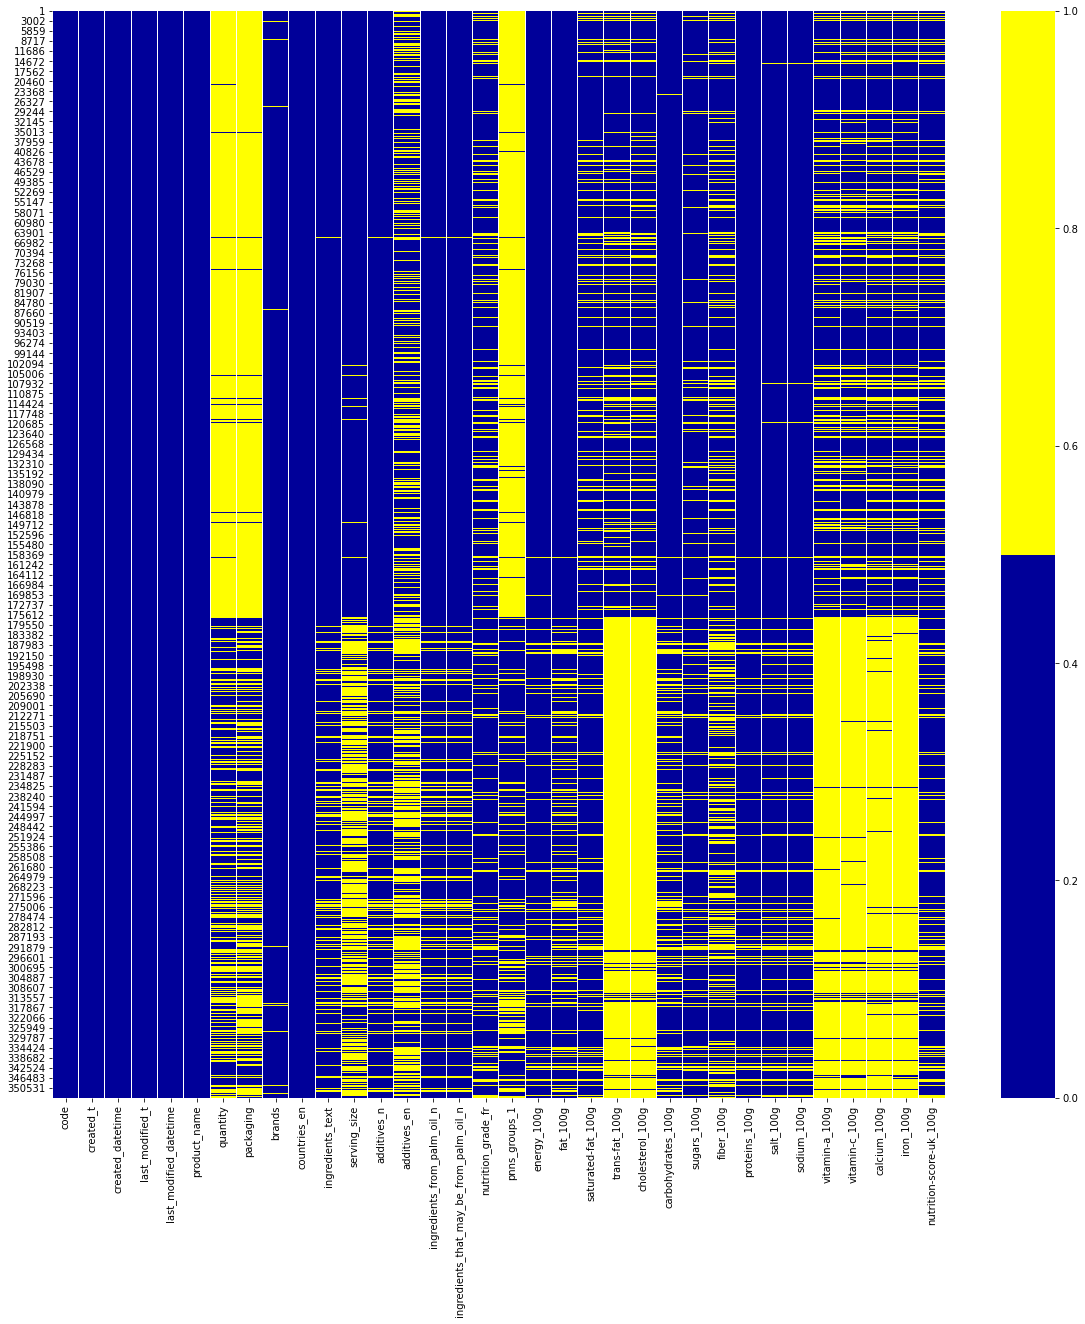

In [1021]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df.isnull(), cmap = sns.color_palette(colors))

### 3| Duplicates

I check for duplicate rows in the dataframe, but it looks that there is none.

In [1022]:
df.duplicated(keep = 'first').sum()

0

In [1023]:
df.shape

(307433, 34)

In [1024]:
df.drop_duplicates(keep = False, inplace = True)

In [1025]:
df.shape

(307433, 34)

Then I check for duplicate rows in the column 'code' because the code should be unique for each product.

In [1026]:
df.duplicated(['code']).sum()

131

In [1027]:
df.code.value_counts()

70650800367     3
41130599149     2
71828001234     2
16073123454     2
13562000777     2
               ..
79836393303     1
70253466595     1
41331023535     1
876209          1
643906404352    1
Name: code, Length: 307302, dtype: int64

In [1028]:
df[df.code == 70650800367]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
693,70650800367,1489061818,2017-03-09T12:16:58Z,1489061818,2017-03-09T12:16:58Z,Sweet Chili Sauce,NaN,NaN,A Taste Of Thai,United States,"Syrup (sucrose syrup, glucose syrup, fructose ...",5.5 g (1 tsp),1.0,E415 - Xanthan gum,0.0,0.0,NaN,NaN,987.0,0.0,NaN,0.0,NaN,54.55,54.55,NaN,NaN,2.30886,0.909,NaN,NaN,NaN,NaN,NaN
72548,70650800367,1489061874,2017-03-09T12:17:54Z,1489061875,2017-03-09T12:17:55Z,Sweet Chili Sauce,NaN,NaN,A Taste Of Thai,United States,"Syrup (sucrose syrup, glucose syrup, fructose ...",5.5 g (1 tsp),1.0,E415 - Xanthan gum,0.0,0.0,NaN,NaN,987.0,0.0,NaN,0.0,NaN,54.55,54.55,NaN,NaN,2.30886,0.909,NaN,NaN,NaN,NaN,NaN
313803,70650800367,1489057019,2017-03-09T10:56:59Z,1489057019,2017-03-09T10:56:59Z,Sweet Chili Sauce,NaN,NaN,A Taste Of Thai,United States,"Syrup (sucrose syrup, glucose syrup, fructose ...",5.5 g (1 tsp),1.0,E415 - Xanthan gum,0.0,0.0,NaN,NaN,987.0,0.0,NaN,0.0,NaN,54.55,54.55,NaN,NaN,2.30886,0.909,NaN,NaN,NaN,NaN,NaN


In [1029]:
df[df.code == 654989940101]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
68367,654989940101,1489061721,2017-03-09T12:15:21Z,1489061721,2017-03-09T12:15:21Z,"I.M. Healthy, Soynut Butter, Honey",NaN,NaN,The Soynut Butter Company.,United States,"Roasted soybeans, (non-gmo), naturally pressed...",32 g (2 Tbsp),0.0,NaN,0.0,0.0,d,NaN,2485.0,43.75,7.81,0.0,0.0,31.25,12.5,12.5,21.88,0.79248,0.312,0.0,0.0,0.094,0.00394,14.0
123664,654989940101,1489061154,2017-03-09T12:05:54Z,1489061154,2017-03-09T12:05:54Z,Honey Soynut Butter Creamy,NaN,NaN,Im. Heal Thy,United States,"Ingredients: roasted soybeans, (non-gmo), natu...",32 g (2 Tbsp),0.0,NaN,0.0,0.0,d,NaN,2485.0,43.75,7.81,0.0,0.0,31.25,12.5,12.5,21.88,0.79248,0.312,0.0,0.0,0.094,0.00394,14.0


In [1030]:
df[df.code == 722810]      

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
80725,722810,1491740672,2017-04-09T12:24:32Z,1495654632,2017-05-24T19:37:12Z,Sea Salt & Balsamic Vinegar Hand Cooked Crisps,150 g e,"Sachet,Plastique",Marks & Spencer,"France,United Kingdom",Pommes de terre • Huile de tournesol Sucre • V...,NaN,2.0,"E330 - Citric acid,E334 - L(+)-tartaric acid",0.0,0.0,d,Salty snacks,2180.0,30.4,3.2,NaN,NaN,52.8,1.9,4.6,6.7,1.83,0.720472,NaN,NaN,NaN,NaN,12.0
136360,722810,1459668979,2016-04-03T07:36:19Z,1491146173,2017-04-02T15:16:13Z,Sea Salt & Balsamic Vinegar hand cooked Crisps,150 g,"Plastique,sachet",marks and Spencer,"France,United Kingdom",Pomme de terre - huile de tournesol - sucre - ...,30 g,0.0,NaN,0.0,0.0,d,Salty snacks,2173.0,30.4,3.2,NaN,NaN,52.8,1.9,4.6,6.7,1.83,0.720472,NaN,NaN,NaN,NaN,12.0


I observe that the entries are refering to the same product and the same measurements. They are different measurements with the exact same results performed at different times of the same day. So I will keep only one of them (e.g. the first).

In [1031]:
df.columns

Index(['code', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'quantity', 'packaging',
       'brands', 'countries_en', 'ingredients_text', 'serving_size',
       'additives_n', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [1032]:
cols_dupl = ['code', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g']

I will remove the columns with the same code and the same measurements.

In [1033]:
df.drop_duplicates(cols_dupl, keep = 'first', inplace = True)

In [1034]:
df.shape

(307341, 34)

In [1035]:
df.duplicated(['code'], keep = 'first').sum()

39

there are still some duplicate values with respect to 'code'.

In [1036]:
df.drop_duplicates(['code', 'brands'], keep = 'first', inplace = True)

In [1037]:
df.duplicated(['code']).sum()

29

In [1038]:
df.code.value_counts().sort_values(ascending = False).to_frame().head(30)

,code
54491496,2
54491472,2
54492790,2
75001629,2
5400141350470,2
16117,2
37600110754,2
837996,2
58001,2
20048402,2


In [1039]:
double_codes = df.code.value_counts().sort_values(ascending = False).to_frame().head(30)
double_codes.index

Index([     54491496,      54491472,      54492790,      75001629,
       5400141350470,         16117,   37600110754,        837996,
               58001,      20048402,   35493012711,   72101012305,
          9800892204,   24463061071,  853547003030,      80135876,
              673358,   24463061163,    9542011741,     764114944,
         41130599149,    9542013028,   72220008593,   18894004721,
         16571910310,   76186000028,   78895300024,    8725020082,
            87177756, 5410126806052],
      dtype='object')

In [1040]:
df[df.code.isin([  54491496,        837996,   35493012711,        673358,
          8725020082,    9800892204,      20048402,   24463061071,
         16571910310,      80135876,   72220008593,   41130599149,
            54492790,   76186000028,   72101012305,      87177756,
         78895300024,     764114944,   24463061163,         58001,
         37600110754,      75001629,         16117,  853547003030,
            54491472,    9542011741,   18894004721,    9542013028,
       5400141350470,  793573184238])  ].sort_values(by = 'code')

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
6,16117,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,Lundberg,United States,Organic long grain white rice,45 g (0.25 cup),0.0,NaN,0.0,0.0,NaN,NaN,1490.0,NaN,NaN,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN,NaN
498,16117,1489065258,2017-03-09T13:14:18Z,1489065258,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,NaN,NaN,Trader Joe's,United States,"Olives, water, salt, vinegar (contains sulfats...",18 g (18 g),1.0,E270 - Lactic acid,0.0,0.0,NaN,NaN,347.0,8.33,NaN,NaN,NaN,0.00,NaN,NaN,0.00,3.385820,1.333000,NaN,0.0000,NaN,NaN,NaN
157,58001,1489055734,2017-03-09T10:35:34Z,1489055734,2017-03-09T10:35:34Z,Organic Salted Pistachios,NaN,NaN,Unfi,United States,"Organic pistachios, sea salt.",28 g (28 g),0.0,NaN,0.0,0.0,d,NaN,2540.0,46.43,5.3600,NaN,NaN,32.14,10.71,10.70,21.43,1.450340,0.571000,NaN,NaN,0.143,0.00386,15.0
666,58001,1487432837,2017-02-18T15:47:17Z,1487432838,2017-02-18T15:47:18Z,Bramley Apple Crumble,NaN,NaN,Mark & Spencer,France,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,1192.0,NaN,7.4000,NaN,NaN,NaN,21.60,2.20,3.20,0.230000,0.090551,NaN,NaN,NaN,NaN,12.0
178,673358,1483117649,2016-12-30T17:07:29Z,1483117649,2016-12-30T17:07:29Z,Veggie Colin the Caterpillar,170g,NaN,NaN,United Kingdom,"sugar, glucose syrup, modified potato starch, ...",NaN,4.0,"E170 - Calcium carbonate,E270 - Lactic acid,E2...",0.0,0.0,NaN,NaN,1329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68706,673358,1503071956,2017-08-18T15:59:16Z,1503071960,2017-08-18T15:59:20Z,Veggie Colin,NaN,NaN,Marks And Spencer,France,INGRÉDIENTS : Sucre • Sirop. de glucose • Fécu...,NaN,3.0,"E170 - Calcium carbonate,E296 - Malic acid,E33...",0.0,0.0,d,unknown,1310.0,0.10,0.1000,NaN,NaN,78.20,56.40,NaN,0.10,0.100000,0.039370,NaN,NaN,NaN,NaN,13.0
102391,837996,1502459437,2017-08-11T13:50:37Z,1502459444,2017-08-11T13:50:44Z,Vegetable pasta bake with broccoli & petit pois,NaN,NaN,Marks&Spencer,France,Gluten ) • Eau • Lait demi-écremé • Brocoli (9...,NaN,1.0,E375 - Nicotinic acid,0.0,0.0,c,unknown,1979.0,3.80,1.6000,NaN,NaN,14.50,1.70,1.40,4.70,0.450000,0.177165,NaN,NaN,NaN,NaN,4.0
157256,837996,1474571409,2016-09-22T19:10:09Z,1491142414,2017-04-02T14:13:34Z,Vegetable Pasta Bake with Broccoli & Petit Pois,350 g,"Plastique,Frais,Carton",Marks & Spencer,"France,United Kingdom",Pâtes cuites (25%) Eau - Semoule de blé dur (c...,350 g,2.0,"E170 - Calcium carbonate,E375 - Nicotinic acid",0.0,0.0,b,Composite foods,473.0,3.80,1.6000,NaN,NaN,14.50,1.70,1.40,4.40,0.450000,0.177165,NaN,NaN,NaN,NaN,0.0
219,20048402,1489092657,2017-03-09T20:50:57Z,1489092657,2017-03-09T20:50:57Z,Freshly Baked Chocolat Croissant,NaN,NaN,Fresh & Easy,United States,"Wheat flour, butter, water, chocolate (sugar, ...",60 g (1 CROLSSANT),2.0,"E300 - Ascorbic acid,E322 - Lecithins,E322i - ...",0.0,0.0,e,NaN,1812.0,23.33,13.3300,0.83,0.075,45.00,11.67,1.70,8.33,1.059180,0.417000,0.000000,0.0000,0.000,0.00060,19.0
179807,20048402,1365270699,2013-04-06T17:51:39Z,1448119719,2015-11-21T15:28:39Z,Blanc de poulet,125g (25 tranches),Emballage plastique,Dulano,France,"Viande de poulet, sel, dextrose, stabilisateur...",5 g,1.0,E250 - Sodium nitrite,0.0,0.0,d,Fish Meat Eggs,469.0,2.00,0.8000,NaN,NaN,3.00,1.30,0.50,20.00,2.540000,1.000000,NaN,NaN,NaN,NaN,11.0


I observe that the duplicates in this list apart from those with code: 16117, 58001, 200484022 refer to the same product. So I will change the code of one of these duplicates, so as to artficially create unique codes for these products and then I will drop the rest of the duplicates on 'code'. 

In [1041]:
df[df.code == 161177]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g


In [1042]:
df[df.code == 580011]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g


In [1043]:
df[df.code == 200484022]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g


I assign unique codes to these duplicates that correspond to different products.

In [1044]:
df.loc[6,'code'] = 161177

In [1045]:
df.loc[157,'code'] = 580011

In [1046]:
df.loc[219,'code'] = 200484022

I drop the rest duplicates on 'code'

In [1047]:
df.duplicated(['code'], keep = 'first').sum()

26

In [1048]:
df.drop_duplicates(['code'], keep = 'first', inplace = True)

In [1049]:
df.shape

(307305, 34)

In [1050]:
df.duplicated(['product_name'], keep = 'first').sum()

82149

In [1051]:
df.product_name.value_counts()

Ice Cream                                    411
Extra Virgin Olive Oil                       302
Potato Chips                                 281
Premium Ice Cream                            226
Tomato Ketchup                               186
                                            ... 
Prügeli Milch 23G Mega Pack                    1
Roquefort Aop Portion                          1
Grandlait Frais demi-écrémé                    1
Harvest Pumpkin Bisque                         1
Chocolate negro extrafino con edulcorante      1
Name: product_name, Length: 225156, dtype: int64

In [1052]:
df[df.product_name == 'Ice Cream'].head()

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
1803,11110004659,1489138582,2017-03-10T09:36:22Z,1489138582,2017-03-10T09:36:22Z,Ice Cream,NaN,NaN,Private Selection,United States,"Ice cream - milk, cream, sugar, corn syrup, na...",85 g (0.5 cup),5.0,"E150a - Plain caramel,E410 - Locust bean gum,E...",0.0,0.0,d,NaN,1134.0,14.12,9.41,0.0,0.047,30.59,25.88,0.0,4.71,0.20828,0.082,0.000141,0.0014,0.118,0.00000,17.0
1875,11110014368,1489133921,2017-03-10T08:18:41Z,1489133921,2017-03-10T08:18:41Z,Ice Cream,NaN,NaN,Prrivate Selection,United States,"Ice cream - milk, cream, sugar, corn syrup, wh...",84 g (0.5 cup),5.0,"E407 - Carrageenan,E410 - Locust bean gum,E412...",0.0,0.0,d,NaN,1046.0,13.10,7.14,0.0,0.065,28.57,22.62,1.2,3.57,0.22606,0.089,0.000143,0.0014,0.119,0.00043,14.0
2021,11110021595,1489090286,2017-03-09T20:11:26Z,1489090287,2017-03-09T20:11:27Z,Ice Cream,NaN,NaN,Private Selection,United States,"Ice cream - milk, cream, sugar, corn syrup, na...",85 g (0.5 cup),4.0,"E410 - Locust bean gum,E412 - Guar gum,E466 - ...",0.0,0.0,d,NaN,1084.0,12.94,8.24,0.0,0.047,32.94,25.88,0.0,4.71,0.37338,0.147,0.000106,0.0014,0.118,0.00000,17.0
2058,11110023605,1489090287,2017-03-09T20:11:27Z,1489090287,2017-03-09T20:11:27Z,Ice Cream,NaN,NaN,Private Selection,United States,"Milk, cream, sugar, corn syrup, coffee concent...",94 g (0.5 cup),5.0,"E407 - Carrageenan,E410 - Locust bean gum,E412...",0.0,0.0,d,NaN,891.0,11.70,7.45,0.0,0.048,24.47,19.15,0.0,3.19,0.13462,0.053,0.000128,0.0013,0.106,0.00000,13.0
2560,11110502919,1489090290,2017-03-09T20:11:30Z,1489090290,2017-03-09T20:11:30Z,Ice Cream,NaN,NaN,The Kroger Co.,United States,"Ice cream: milk, cream, corn syrup, sugar, hig...",64 g (0.5 cup),7.0,"E160b - Annatto,E407 - Carrageenan,E410 - Locu...",0.0,1.0,d,NaN,916.0,10.94,7.03,0.0,0.039,28.12,25.00,0.0,3.12,0.17780,0.070,0.000094,0.0019,0.125,0.00000,14.0


Although the product name is the same these are different products of the same kind (ice cream) with different measurements. So I will leave all the values.

### 4| Columns with mixed data types

 I check the columns that have mixed types (cols_mixec_types) which I detected in the beginning which are present in the columns after discarding the missing values which were giving me the read_csv error message.
 The data type of missing values NaN is float.
 
 Note: The Nutri-Score UK grade is determined by the amount of healthy and unhealthy nutrients:
- Negative points: energy, saturated fat, sugars, sodium (high levels are considered unhealthy)
- Positive points: the proportion of fruits, vegetables and nuts, of olive, colza and nut oils, of fibers and proteins (high levels are considered good for health).

In [1053]:
pd.options.display.max_rows = 34

In [1054]:
for i in range(df.shape[1]):
    print(i,set(map(type, df.iloc[:,i])), '--------->' , df.columns[i])

0 {<class 'int'>, <class 'float'>, <class 'str'>} ---------> code
1 {<class 'int'>, <class 'str'>} ---------> created_t
2 {<class 'float'>, <class 'str'>} ---------> created_datetime
3 {<class 'int'>, <class 'str'>} ---------> last_modified_t
4 {<class 'str'>} ---------> last_modified_datetime
5 {<class 'str'>} ---------> product_name
6 {<class 'float'>, <class 'str'>} ---------> quantity
7 {<class 'float'>, <class 'str'>} ---------> packaging
8 {<class 'float'>, <class 'str'>} ---------> brands
9 {<class 'float'>, <class 'str'>} ---------> countries_en
10 {<class 'float'>, <class 'str'>} ---------> ingredients_text
11 {<class 'float'>, <class 'str'>} ---------> serving_size
12 {<class 'float'>} ---------> additives_n
13 {<class 'float'>, <class 'str'>} ---------> additives_en
14 {<class 'float'>} ---------> ingredients_from_palm_oil_n
15 {<class 'float'>} ---------> ingredients_that_may_be_from_palm_oil_n
16 {<class 'float'>, <class 'str'>} ---------> nutrition_grade_fr
17 {<class 'fl

I will resolve the mixed data types for 'code' with casting an appropriate data type per column, the type "int".


In [1055]:
set(map(type, df.code))

{float, int, str}

In [1056]:
df.code.value_counts().sort_values(ascending = False).head(12)

643906404352     1
51933347885      1
5410126806052    1
3250392137823    1
96619462674      1
854526001153     1
3700029205116    1
5051379004248    1
3000143042223    1
76406063109      1
8005734012741    1
51933347847      1
Name: code, dtype: int64

### 5| Numerical columns: Errors and Typos

First off, I will slice my dataframe such that I get only the columns with. numerical data.

In [1057]:
df_numerical = df._get_numeric_data()

In [1058]:
df_numerical.columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-uk_100g'],
      dtype='object')

Now I will get summary statistics

In [1059]:
df_numerical.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90 ]).round(5)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
count,281946.00000,281946.00000,281946.00000,291861.00000,2.760320e+05,260771.00000,143213.00000,143939.00000,2.757460e+05,275980.00000,2.182970e+05,2.906810e+05,286581.00000,286544.00000,137463.00000,140747.00000,141197.00000,140403.00000,251976.00000
mean,1.87834,0.02285,0.05959,1124.38278,5.676947e+04,5.07784,0.07348,0.02007,5.684710e+04,15.66483,3.885476e+05,5.390358e+04,1.94923,0.76751,0.00040,0.02339,0.12716,0.00379,8.96708
std,2.50263,0.15125,0.28042,924.17954,2.981926e+07,7.95532,1.54029,0.35825,2.983472e+07,21.99751,1.815369e+08,2.905817e+07,121.20736,47.72251,0.07330,2.23741,3.35300,0.21676,9.14899
min,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.00000,-3.57000,0.00000,0.000000e+00,-17.86000,-6.700000e+00,-8.000000e+02,0.00000,0.00000,-0.00034,-0.00210,0.00000,-0.00026,-15.00000
10%,0.00000,0.00000,0.00000,151.00000,0.000000e+00,0.00000,0.00000,0.00000,5.000000e-01,0.00000,0.000000e+00,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-2.00000
25%,0.00000,0.00000,0.00000,381.00000,1.000000e-01,0.00000,0.00000,0.00000,5.600000e+00,1.20000,0.000000e+00,7.100000e-01,0.06000,0.02362,0.00000,0.00000,0.00000,0.00000,1.00000
50%,1.00000,0.00000,0.00000,1092.00000,5.260000e+00,1.79000,0.00000,0.00000,2.000000e+01,5.40000,1.500000e+00,4.840000e+00,0.56000,0.22047,0.00000,0.00000,0.03600,0.00101,9.00000
75%,3.00000,0.00000,0.00000,1674.00000,2.000000e+01,7.14000,0.00000,0.02000,5.760000e+01,23.33000,3.600000e+00,1.000000e+01,1.35890,0.53500,0.00011,0.00370,0.10700,0.00240,16.00000
90%,5.00000,0.00000,0.00000,2176.00000,3.333000e+01,15.00000,0.00000,0.06900,7.429000e+01,48.65000,7.100000e+00,1.900000e+01,2.40000,0.94500,0.00032,0.02000,0.21400,0.00389,21.00000
max,30.00000,2.00000,6.00000,231199.00000,1.566667e+10,550.00000,369.00000,95.23800,1.566667e+10,3520.00000,8.481815e+10,1.566667e+10,64312.80000,25320.00000,26.70000,716.98110,694.73700,50.00000,40.00000


In [1060]:
df_numerical.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90 ]).round(5).T
# apply("{0:.3f}".format)

,count,mean,std,min,10%,25%,50%,75%,90%,max
additives_n,281946.0,1.87834,2.502630e+00,0.00000,0.0,0.00000,1.00000,3.00000,5.00000,3.000000e+01
ingredients_from_palm_oil_n,281946.0,0.02285,1.512500e-01,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,2.000000e+00
ingredients_that_may_be_from_palm_oil_n,281946.0,0.05959,2.804200e-01,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,6.000000e+00
energy_100g,291861.0,1124.38278,9.241795e+02,0.00000,151.0,381.00000,1092.00000,1674.00000,2176.00000,2.311990e+05
fat_100g,276032.0,56769.47459,2.981926e+07,0.00000,0.0,0.10000,5.26000,20.00000,33.33000,1.566667e+10
saturated-fat_100g,260771.0,5.07784,7.955320e+00,0.00000,0.0,0.00000,1.79000,7.14000,15.00000,5.500000e+02
trans-fat_100g,143213.0,0.07348,1.540290e+00,-3.57000,0.0,0.00000,0.00000,0.00000,0.00000,3.690000e+02
cholesterol_100g,143939.0,0.02007,3.582500e-01,0.00000,0.0,0.00000,0.00000,0.02000,0.06900,9.523800e+01
carbohydrates_100g,275746.0,56847.10422,2.983472e+07,0.00000,0.5,5.60000,20.00000,57.60000,74.29000,1.566667e+10
sugars_100g,275980.0,15.66483,2.199751e+01,-17.86000,0.0,1.20000,5.40000,23.33000,48.65000,3.520000e+03


By visual ispection, I observe that there are some typos or mistakes in the measurement. For example: in the column 'sugar_100g' the content per 100g cannot be more than 100g (max = 3520).  The olive oil (100% fat) has energy 3691KJ so any values greater than that may also considered mistakes. Furthermore the negative values of content in grams indicate a mistake in the measurement. 

In [1061]:
df.shape

(307305, 34)

In [1062]:
((df['sugars_100g'] < 0)|(df['fiber_100g'] < 0)| (df['trans-fat_100g'] < 0) | (df['proteins_100g'] < 0) |(df['vitamin-a_100g'] < 0)|(df['vitamin-c_100g'] <0)).sum()

17

Since the number of quantities in negative values is small, I will filter them out.

In [1063]:
negative_values = ((df['sugars_100g'] < 0)|(df['fiber_100g'] < 0)| (df['proteins_100g'] < 0) | (df['trans-fat_100g'] < 0)|(df['vitamin-a_100g'] < 0)|(df['vitamin-c_100g'] <0))

In [1064]:
negative_values.sum()

17

In [1065]:
(~negative_values).sum()

307288

In [1066]:
df = df[(~negative_values)]

In [1067]:
df.shape

(307288, 34)

In [1068]:
(df['energy_100g'] > 37000).sum()

2

In [1069]:
(df['fat_100g'] > 100).sum()

3

In [1070]:
(df['saturated-fat_100g'] > 100).sum()

2

In [1071]:
(df['trans-fat_100g'] >100).sum()

5

In [1072]:
 (df['cholesterol_100g'] > 100).sum()

0

In [1073]:
(df['carbohydrates_100g'] > 100).sum()

20

In [1074]:
 more_than_100 = ((df['fat_100g'] > 100)|                     #3
                  (df['saturated-fat_100g'] > 100)|            #2
                  (df['trans-fat_100g'] >100)|                 #5
                  (df['cholesterol_100g'] > 100)|              #0
                  (df['carbohydrates_100g'] > 100)|      #20
                  (df['salt_100g'] > 100)|
                  (df['sodium_100g'] > 100)|
                  (df['calcium_100g'] > 100)|
                  (df['sugars_100g'] > 100)|
                  (df['fiber_100g'] > 100)| 
                  (df['proteins_100g'] > 100) |
                  (df['vitamin-a_100g'] > 100)|
                  (df['iron_100g'] > 100)|
                  (df['trans-fat_100g'] > 100)|
                  (df['vitamin-c_100g'] > 100))

In [1075]:
more_than_100.sum()

218

In [1076]:
df = df[(~more_than_100)]

In [1077]:
df.shape

(307070, 34)

Fats and ethanol have the greatest amount of food energy per gram, 37 and 29 kilojoules per gram (8.8 and 6.9 kcal/g), respectively. According to the information on the data the Energy is measured in KJ, so any value greater than 37000KJ per 100g is not valid and has to be filtered out. But it seems that it has removed from the previous step.

In [1078]:
df.shape

(307070, 34)

In [1079]:
(df['energy_100g'] > 37000).sum()

1

In [1080]:
(df['energy_100g'] <= 37000).sum()

291630

In [1081]:
df.shape

(307070, 34)

In [1082]:
(df['energy_100g'] < 37000).sum()

291630

In [1083]:
df[(df['energy_100g'] > 37000)]

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
120557,619309100979,1489073639,2017-03-09T15:33:59Z,1489073639,2017-03-09T15:33:59Z,"Sophia, Italian Drink, Squeezed Lime",NaN,NaN,Sophia Foods Inc.,United States,"Water, lime juice, acidificant; citric acid, n...",5 ml (1 tsp),1.0,E330 - Citric acid,0.0,0.0,NaN,NaN,94140.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1084]:
i = df[(df['energy_100g'] > 37000)].index
i

Int64Index([120557], dtype='int64')

In [1085]:
df = df.drop(i)

In [1086]:
df.shape

(307069, 34)

In [1087]:
food = df.copy()

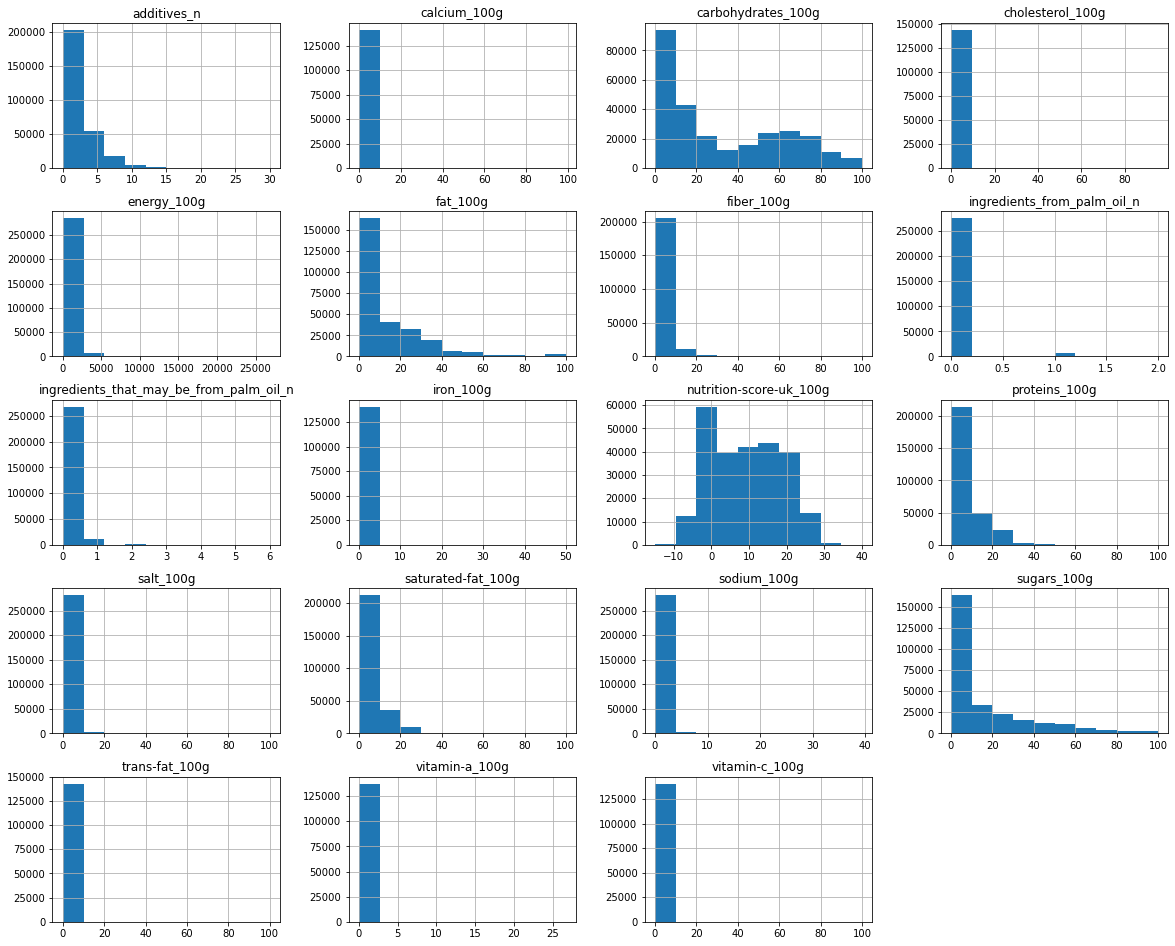

In [1088]:
food.hist(figsize=(20,20), layout=(6,4))

plt.show()

### 6| Outliers (single feature)

In [1089]:
df_numerical = df._get_numeric_data()

In [1090]:
df_numerical.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]).round(5).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
additives_n,281725.0,1.87918,2.50279,0.00000,0.0,0.00000,1.00000,3.00000,5.00000,30.00000
ingredients_from_palm_oil_n,281725.0,0.02287,0.15131,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,2.00000
ingredients_that_may_be_from_palm_oil_n,281725.0,0.05963,0.28050,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,6.00000
energy_100g,291630.0,1123.64642,801.59046,0.00000,151.0,381.00000,1092.00000,1674.00000,2176.00000,26861.00000
fat_100g,275807.0,12.77727,17.50288,0.00000,0.0,0.10000,5.26000,20.00000,33.33000,100.00000
saturated-fat_100g,260650.0,5.07509,7.87467,0.00000,0.0,0.00000,1.79000,7.14000,15.00000,100.00000
trans-fat_100g,143128.0,0.06721,0.94492,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,100.00000
cholesterol_100g,143859.0,0.01963,0.31824,0.00000,0.0,0.00000,0.00000,0.02000,0.06900,95.23800
carbohydrates_100g,275516.0,31.53087,28.99856,0.00000,0.5,5.60000,20.00000,57.61500,74.29000,100.00000
sugars_100g,275852.0,15.64874,20.95174,0.00000,0.0,1.20000,5.40000,23.33000,48.65000,100.00000


By visual inspection,  I observe that in many cases the max values are far from the 75% quantile (or Q3) indicating that there may be  outliers and the min values that refer to quatities in gr are negative. Likewise, if we compare the mean and the median (50% quantile) then we see that in many cases they are far apart, which indicates outlier candidates.
this is because the mean is calculated taking into account all the data points and therefore it there are outliers its value is greater than the median. The standard deviation reflects the possible presence of outliers. In any case the distribution of many variables seems to be skewed. So let's have a look at the distribution of the numerical variables.

In [1091]:
f = pd.melt(df, value_vars = df_numerical)

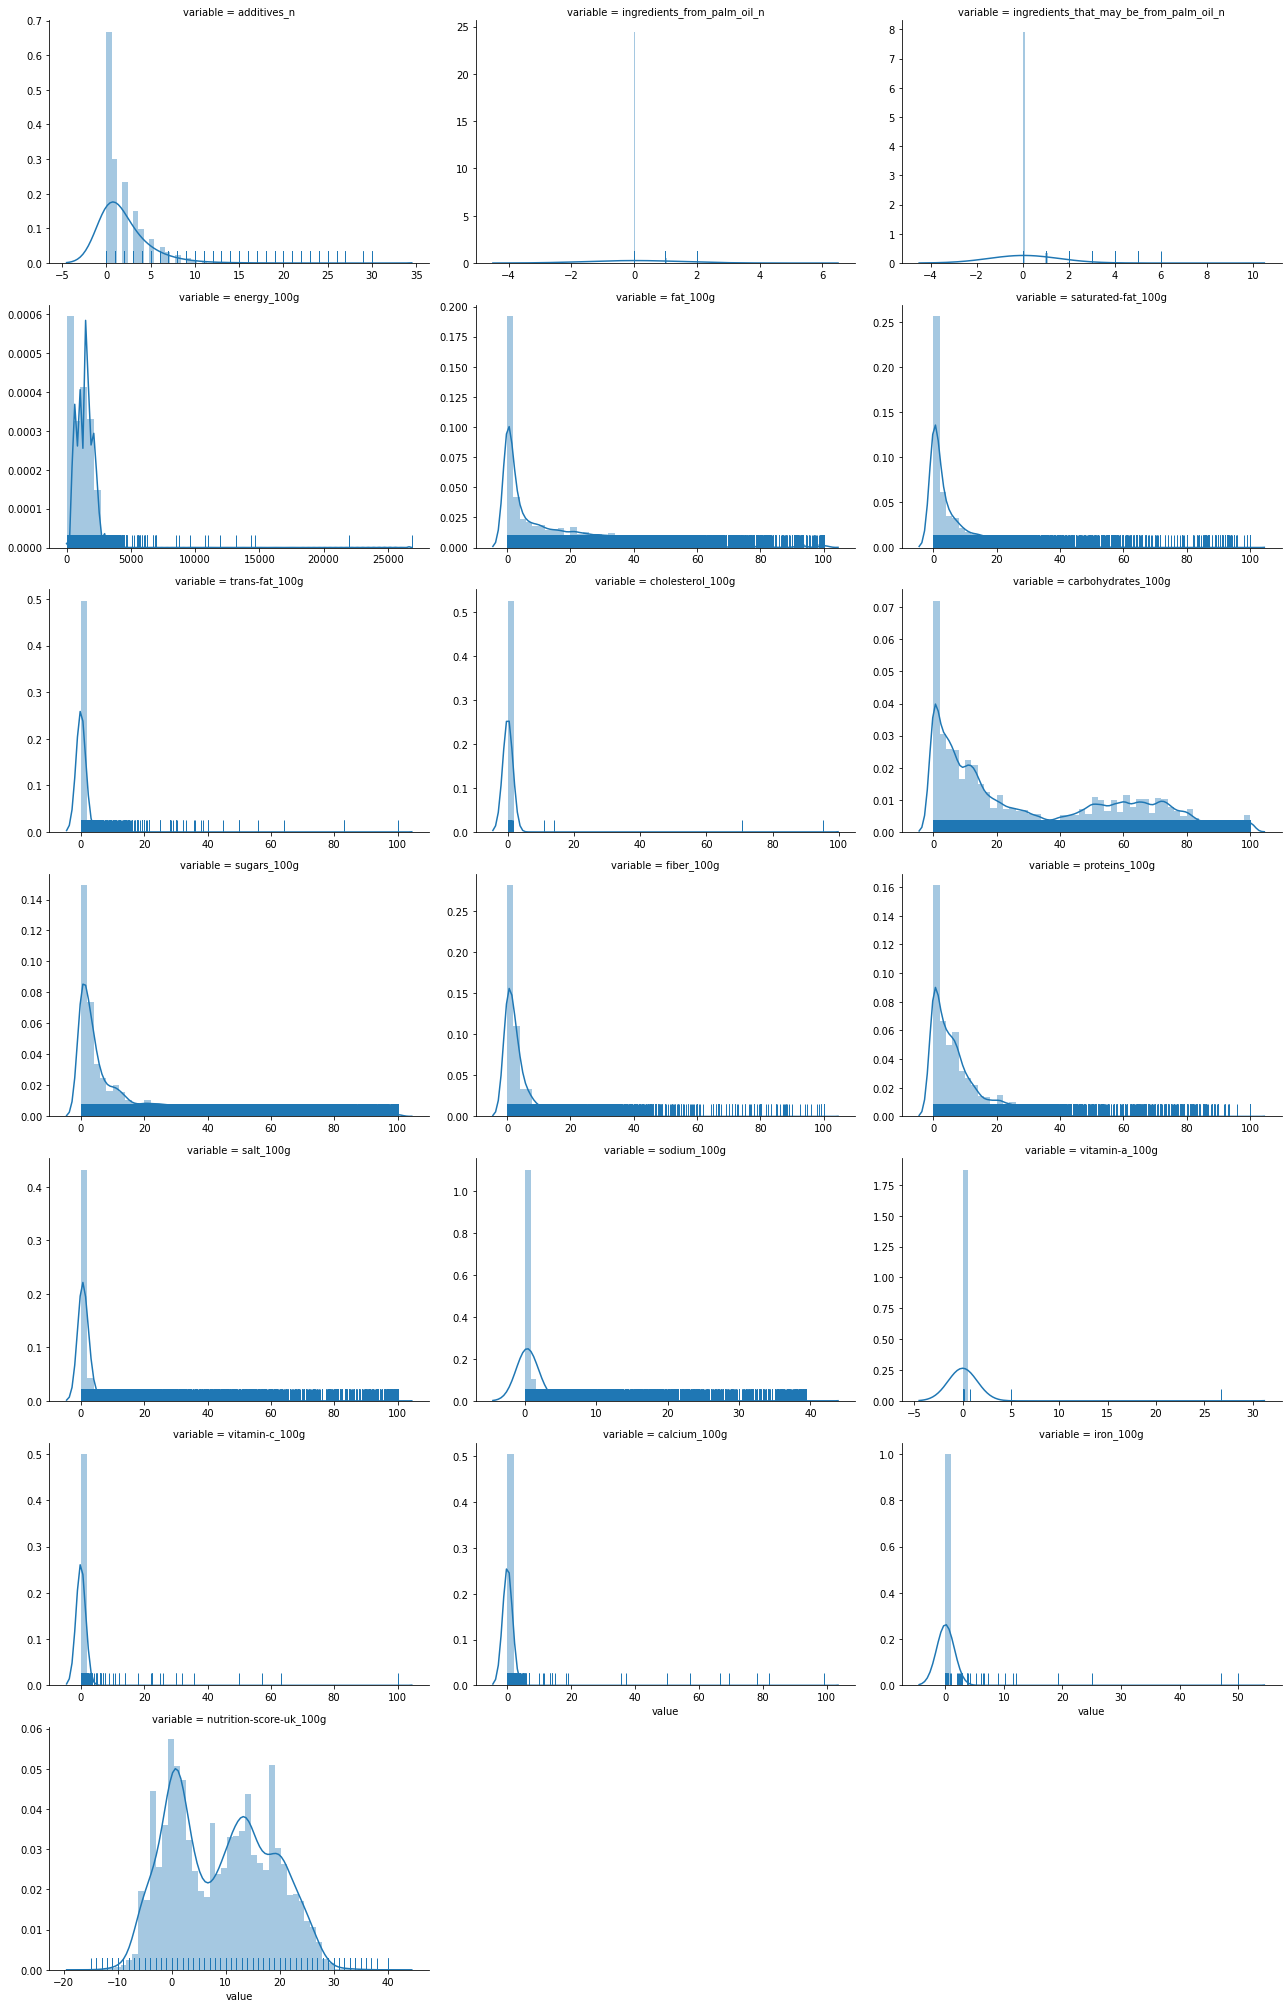

In [1092]:
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey = False, height = 4, aspect = 1.5)
g = g.map(sns.distplot, 'value', hist = True, kde_kws={'bw': 1.5}, rug = True)

# sns.distplot(x, fit=norm, kde=False)

Reference: https://towardsdatascience.com/creating-python-functions-for-exploratory-data-analysis-and-data-cleaning-2c462961bd71

from the density functions and the normallized histograms of the above plots I observe that none of the distributions are normal or could be considered normal. Thus the z-score cannot be used in this case. The distributions are skewed and in this dataset may be it does not make sense to omit the outliers because of the great diversity of the products.

In [1093]:
df_numerical.columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-uk_100g'],
      dtype='object')

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value enco

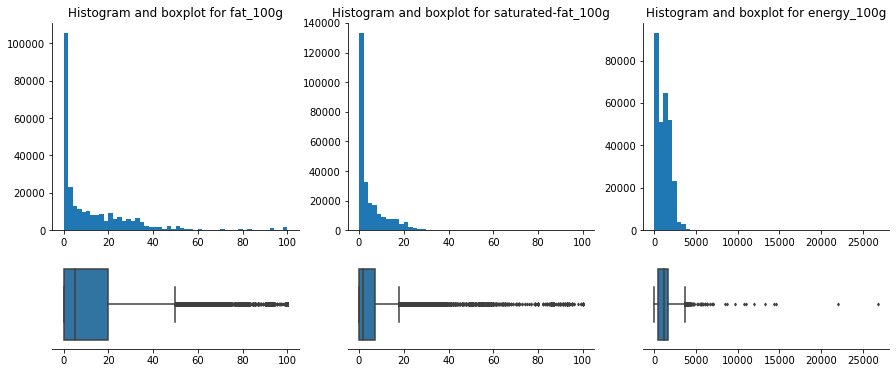

In [1094]:
fig, axes = plt.subplots(
   2 , 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feature, plot_col) in zip(
    ['fat_100g', 'saturated-fat_100g', 'energy_100g'], [0, 1, 2]  # pairing feature with column in plot
):
 #   ,7,8,9,10,11,12,13,14,15,16,17,18,18
    axes[0, plot_col].hist(df[feature], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feature], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value enco

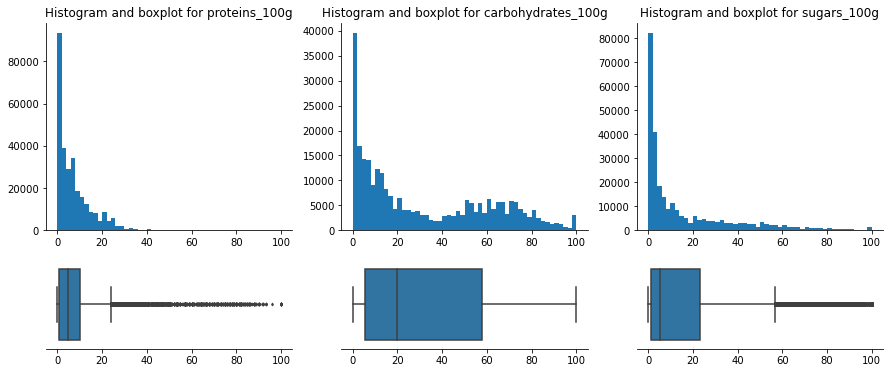

In [1095]:



fig, axes = plt.subplots(
   2 , 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feature, plot_col) in zip(
    ['proteins_100g','carbohydrates_100g', 'sugars_100g'], [0, 1, 2]  # pairing feature with column in plot
):
 #   ,7,8,9,10,11,12,13,14,15,16,17,18,18
    axes[0, plot_col].hist(df[feature], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feature], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value enco

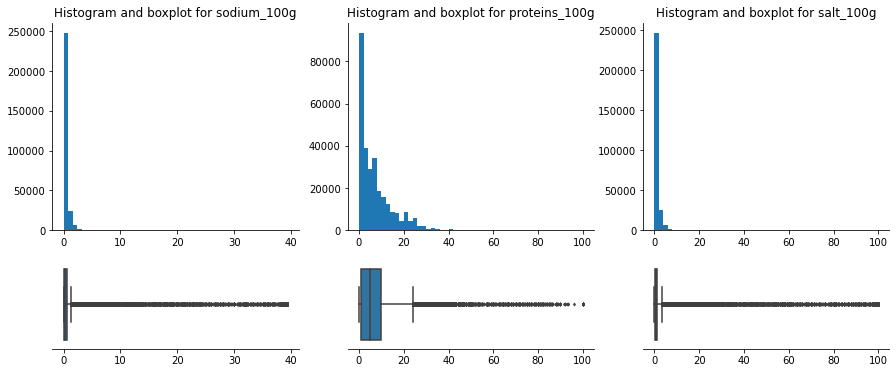

In [1096]:
fig, axes = plt.subplots(
   2 , 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feature, plot_col) in zip(
    ['sodium_100g', 'proteins_100g',
       'salt_100g'], [0, 1, 2]  # pairing feature with column in plot
):
 #   ,7,8,9,10,11,12,13,14,15,16,17,18,18
    axes[0, plot_col].hist(df[feature], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feature], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


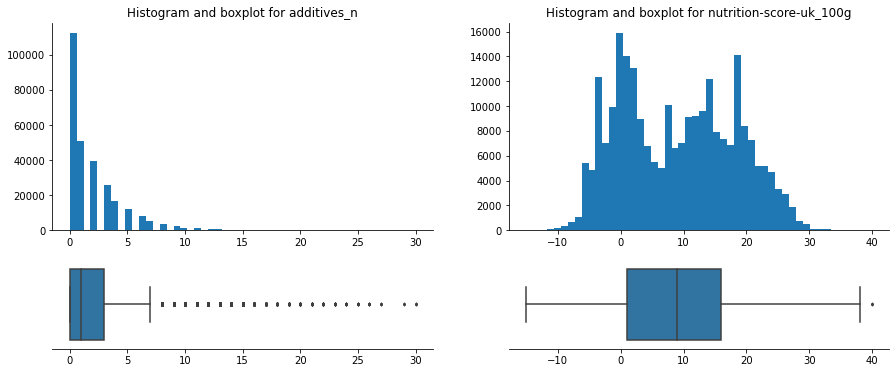

In [1097]:
fig, axes = plt.subplots(
   2 , 2, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feature, plot_col) in zip(
    ['additives_n','nutrition-score-uk_100g'], [0, 1, 2]  # pairing feature with column in plot
):
 #   ,7,8,9,10,11,12,13,14,15,16,17,18,18
    axes[0, plot_col].hist(df[feature], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feature))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feature], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

### 7| Outliers (multi feature)


### 8| Columns with non-Latin Characters

In [1098]:
import string as str
import regex as re

I observe that there are many non-Latin characters in this data set. For example in the forth raw from the end of the data frame the product name entails chinese or chirilic characters. Example:

In [1099]:
df[df['countries_en'] == 'China'].tail(2)

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
353493,9153758906108,1421804683,2015-01-21T01:44:43Z,1421842044,2015-01-21T12:07:24Z,巧克力夹心饼干,106 g,NaN,OREO,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,2035.0,22.5,NaN,NaN,NaN,65.0,NaN,NaN,4.8,1.06680,0.420,NaN,NaN,NaN,NaN,NaN
355740,9555118659523,1421805329,2015-01-21T01:55:29Z,1421842276,2015-01-21T12:11:16Z,特浓鲜奶薄饼,300g,NaN,特浓鲜奶薄饼,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,1837.0,11.0,1.6,NaN,NaN,70.0,NaN,NaN,15.0,0.09652,0.038,NaN,NaN,NaN,NaN,NaN


In [1100]:
df[df['countries_en'] == 'Russia'].tail(2)

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
355896,9602070947776,1497253819,2017-06-12T07:50:19Z,1497856390,2017-06-19T07:13:10Z,Печенье &quot;Овсяное&quot; настоящее,320 г,NaN,Ярославские сласти,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sugary snacks,1758.0,14.0,NaN,NaN,NaN,69.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355940,9688014090357,1478875510,2016-11-11T14:45:10Z,1478876263,2016-11-11T14:57:43Z,100 г очищенных жареных семечек,100 г,NaN,Семечек стакан,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,2970.0,65.0,NaN,NaN,NaN,6.0,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are also some french special characters such as é and ô. Example:

In [1101]:
text1 = df.loc[355896,'brands']
text1

'Ярославские сласти'

In [1102]:
text2 = df.loc[353493,'product_name']
text2

'巧克力夹心饼干'

The Unicode range of the basic Latin charecters is 0000 — 007F. The supplement-1 of Latin Characters (like é and ô) are within the range betwee 00A0 — 00FF. I will clean my data frame so that it only entails basic Latin characters.

source: https://jrgraphix.net/research/unicode_blocks.php

In [1103]:
text1.encode('utf-8')

b'\xd0\xaf\xd1\x80\xd0\xbe\xd1\x81\xd0\xbb\xd0\xb0\xd0\xb2\xd1\x81\xd0\xba\xd0\xb8\xd0\xb5 \xd1\x81\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd0\xb8'

In [1104]:
text1.encode('ascii', 'replace')

b'??????????? ??????'

In [1105]:
text2.encode('utf-8')

b'\xe5\xb7\xa7\xe5\x85\x8b\xe5\x8a\x9b\xe5\xa4\xb9\xe5\xbf\x83\xe9\xa5\xbc\xe5\xb9\xb2'

In [1106]:
text2.encode('utf-8').decode('utf-8')

'巧克力夹心饼干'

In [1107]:
text1.encode('ascii', 'ignore')

b' '

In [1108]:
text1.encode().decode()

'Ярославские сласти'

In [1109]:
#pattern = re.compile(ur'[^\u0000-\u007f]')
pat= re.sub(br'[^\p{Latin}\p{Latin}]', b'?',text1.encode())

In [1110]:
pat3= re.sub(br'[^\u0000-\u007f]', b'?',text1.encode())
pat3

b'?????????????????????? ????????????'

I choose not to drop the rows with information in a non-Latin alphabet. If I do that and drop the lines with a product in Chinese, for example, It will be equivalent to droping almost all Chinese products. That would influence my analysis if I choose to provide insights on a per country basis.

### 9| top 10 more frequent categorical columns

In [1111]:
df.columns 

Index(['code', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'quantity', 'packaging',
       'brands', 'countries_en', 'ingredients_text', 'serving_size',
       'additives_n', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [1112]:
 df_categorical = df.loc[:, ['product_name', 'packaging',
       'brands', 'countries_en', 'ingredients_text', 'serving_size',
       'additives_n', 'additives_en', 'nutrition_grade_fr',
       'pnns_groups_1']]

In [1113]:
df_categorical['ingredients_text'] = df_categorical['ingredients_text'].str.replace('\.$', '')

In [1114]:
df_categorical['ingredients_text'].value_counts()

Extra virgin olive oil                                                                                                                                                                                                                                                                                                            394
Almonds                                                                                                                                                                                                                                                                                                                           274
Honey                                                                                                                                                                                                                                                                                                                             263
Carbonated water, natu

In [1115]:
prev = pd.DataFrame([[1,2,3,4,5,6,7,8,9,10]]).T
prev.columns = ['Rating']
pd.DataFrame([[0,1,2,3,4,5,6,7,8,9]]).T
for col in df_categorical.columns:
    temp = df[col].value_counts().sort_values().sort_values(ascending = False).head(10).to_frame()
    temp.reset_index(inplace = True)
    temp = temp.iloc[:,0].to_frame()
    temp.columns = [col]
    top_10 = pd.concat([prev,temp], axis = 1)
    prev = top_10
    
top_10

,Rating,product_name,packaging,brands,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,pnns_groups_1
0,1,Ice Cream,"Sachet,Plastique",Carrefour,United States,"Carbonated water, natural flavor.",240 ml (8 fl oz),0.0,E330 - Citric acid,d,unknown
1,2,Extra Virgin Olive Oil,Carton,Auchan,France,Almonds.,28 g (1 oz),1.0,"E322 - Lecithins,E322i - Lecithin",c,Sugary snacks
2,3,Potato Chips,Plastique,U,Switzerland,Extra virgin olive oil.,28 g (1 ONZ),2.0,"E101 - Riboflavin,E101i - Riboflavin,E375 - Ni...",e,Beverages
3,4,Premium Ice Cream,"Bouteille,Verre",Meijer,Germany,Extra virgin olive oil,15 ml (1 Tbsp),3.0,E300 - Ascorbic acid,a,Milk and dairy products
4,5,Tomato Ketchup,"sachet,plastique",Casino,Spain,"Semolina (wheat), durum flour (wheat), niacin,...",30 g,4.0,E415 - Xanthan gum,b,Cereals and potatoes
5,6,Beef Jerky,Kunststoff,Leader Price,United Kingdom,Honey,30 g (2 Tbsp),5.0,"E300 - Ascorbic acid,E330 - Citric acid",NaN,Fish Meat Eggs
6,7,Pinto Beans,Conserve,Kroger,"France,Switzerland",Walnuts.,30 g (0.25 cup),6.0,"E440 - Pectins,E440i - Pectin",NaN,Composite foods
7,8,Cookies,"Bocal,Verre",Ahold,Russia,Pecans.,240 ml (1 cup),7.0,"E330 - Citric acid,E509 - Calcium chloride",NaN,Fat and sauces
8,9,Popcorn,"Bouteille,Plastique",Spartan,Belgium,"Green beans, water, salt.",14 g (1 Tbsp),8.0,E160b - Annatto,NaN,Fruits and vegetables
9,10,Salsa,"barquette,plastique",Roundy's,Australia,Semoule de _blé_ dur de qualité supérieure.,30 ml (2 Tbsp),9.0,E150a - Plain caramel,NaN,Salty snacks


In [1116]:
top_10['ingredients_text'] = top_10['ingredients_text'].str.replace('\.$', '')

In [1117]:
top_10['ingredients_text']

0                     Carbonated water, natural flavor
1                                              Almonds
2                               Extra virgin olive oil
3                               Extra virgin olive oil
4    Semolina (wheat), durum flour (wheat), niacin,...
5                                                Honey
6                                              Walnuts
7                                               Pecans
8                             Green beans, water, salt
9           Semoule de _blé_ dur de qualité supérieure
Name: ingredients_text, dtype: object

### 7| Columns that contain lists

It can be seen from the output above that the columns 'ingredients_text', 'additives_n', 'brands', 'packaging' contain Lists. also the columns Counties and brands as well.

# B. In-depth analysis
Thanks to your previous exploratory data analysis, you now have a good intuition of what's in your dataset and what are its strengths and weaknesses. You will now work with the data to investigate some properties of your choice. Your goal is to choose 3 interesting questions to answer about the data and perform the necessary steps for the analysis.

The questions that you choose must be complex enough to allow for some substantial data manipulation. As a guideline, below is a sample topic of analysis:

Topic: Investigation on additives identified in the Open Food Facts dataset

1. Are products number of additives correlated with their nutrition scores?
2. Are there countries with more or less risky additives? This additional list may help.
3. What product category is most prone to having many additives?

For each of your 3 questions, choose the appropriate visual methods to communicate your findings.



I will answer the above three questions

First I will make a selection on the columns that I need and change the column name respectively if needed.
the relevant information for this question is in the columns: 'additives_n' and 'nutrition_grade'

In [1118]:
food = df.drop(['quantity', 'packaging', 'brands', 'serving_size','ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], axis = 1) 

In [1119]:
food = food.rename(columns={"countries_en": "countries", 
                            "igredients_text": "igredients", 
                            "nutrition_grade_fr":"nutrition_grade", 
                            "pnns_groups_1":"pnns"}).reset_index(drop=True)

food.head()

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,countries,ingredients_text,additives_n,additives_en,nutrition_grade,pnns,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
0,4530,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),United States,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,NaN,d,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
1,4559,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
2,16087,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,United States,"Organic hazelnuts, organic cashews, organic wa...",0.0,NaN,d,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
3,16094,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,United States,Organic polenta,0.0,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16100,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,United States,"Rolled oats, grape concentrate, expeller press...",0.0,NaN,NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN


### 1. Are product number of additives correlated with their nutrition scores?

The relevant information for this question is in the columns: 'additives_n' and 'nutrition_grade'

In [1120]:
additives = food[["code", "additives_n", "nutrition_grade"]]
additives.head()

,code,additives_n,nutrition_grade
0,4530,0.0,d
1,4559,0.0,b
2,16087,0.0,d
3,16094,0.0,NaN
4,16100,0.0,NaN


In [1121]:
additives.nutrition_grade.nunique()

5

In [1122]:
additives.nutrition_grade.unique()

array(['d', 'b', nan, 'c', 'a', 'e'], dtype=object)

In [1123]:
additives.nutrition_grade.isna().sum()

55199

First I will drop all rows with NaN values in the column nutrition_grade

In [1124]:
additives = additives.dropna(subset = ['nutrition_grade'])

In [1125]:
additives.nutrition_grade.isna().sum()

0

nutrition_grade is a categorical ordinal variable so I change its data type

In [1126]:
additives.nutrition_grade = additives.nutrition_grade.astype('category')
additives.dtypes

code                 object
additives_n         float64
nutrition_grade    category
dtype: object

In [1127]:
add = additives.groupby('additives_n', as_index = False)

In [1128]:
additives_agg = additives.groupby('additives_n', as_index = False)
list(additives_agg)

[(0.0,
                   code  additives_n nutrition_grade
  0                4530          0.0               d
  1                4559          0.0               b
  2               16087          0.0               d
  11              16872          0.0               d
  14              18012          0.0               b
  ...               ...          ...             ...
  307051  9782803671168          0.0               d
  307052  9782811613488          0.0               d
  307053  9782811635848          0.0               b
  307057  9787461062105          0.0               a
  307067       99567453          0.0               b
  
  [87420 rows x 3 columns]),
 (1.0,
                   code  additives_n nutrition_grade
  6               16124          1.0               c
  20              18289          1.0               d
  28              18418          1.0               d
  31              18500          1.0               e
  42              18883          1.0               e


In [1129]:
additives_agg.get_group(0.0)

,code,additives_n,nutrition_grade
0,4530,0.0,d
1,4559,0.0,b
2,16087,0.0,d
11,16872,0.0,d
14,18012,0.0,b
...,...,...,...
307051,9782803671168,0.0,d
307052,9782811613488,0.0,d
307053,9782811635848,0.0,b
307057,9787461062105,0.0,a


In [1130]:
for key, item in additives_agg:
    print(additives_agg.get_group(key), "\n\n")

                 code  additives_n nutrition_grade
0                4530          0.0               d
1                4559          0.0               b
2               16087          0.0               d
11              16872          0.0               d
14              18012          0.0               b
...               ...          ...             ...
307051  9782803671168          0.0               d
307052  9782811613488          0.0               d
307053  9782811635848          0.0               b
307057  9787461062105          0.0               a
307067       99567453          0.0               b

[87420 rows x 3 columns] 


                 code  additives_n nutrition_grade
6               16124          1.0               c
20              18289          1.0               d
28              18418          1.0               d
31              18500          1.0               e
42              18883          1.0               e
...               ...          ...             ...
30

In [1131]:
additives_grouped = additives.groupby('additives_n', as_index = False)['code'].count()
print(additives_agg)

In [1132]:
additives_grouped.keys

<bound method NDFrame.keys of     additives_n   code
0           0.0  87420
1           1.0  43134
2           2.0  34015
3           3.0  21355
4           4.0  13781
5           5.0   9529
6           6.0   6174
7           7.0   4146
8           8.0   2921
9           9.0   1931
10         10.0   1265
11         11.0    916
12         12.0    567
13         13.0    392
14         14.0    352
15         15.0    252
16         16.0    149
17         17.0    114
18         18.0     69
19         19.0     53
20         20.0     41
21         21.0     27
22         22.0     28
23         23.0     19
24         24.0     10
25         25.0      8
26         26.0      6
27         27.0      4
28         29.0      3
29         30.0      4>

In [1133]:
pt = pd.pivot_table(additives, index = ['additives_n'], columns = ['nutrition_grade'], values = 'code', aggfunc = len ).fillna('0')
pt

nutrition_grade,a,b,c,d,e
additives_n,,,,,
0.0,22233,15234,18163,20703.0,11087
1.0,5586,6701,8809,10646.0,11392
2.0,4339,4915,7037,9928.0,7796
3.0,1564,2605,4262,7010.0,5914
4.0,958,1637,2960,4831.0,3395
5.0,664,1172,2154,3545.0,1994
6.0,429,751,1301,2570.0,1123
7.0,257,521,817,1868.0,683
8.0,166,332,575,1399.0,449


just another way of ploting the same thing (just playing around... ). croostab() takes the count() by default but in pivot_table we need to specify with an eggregate function because the default is mean().

The normalization in crosstab() is taking place on a per row basis so I get something like a frequency table.

In [1134]:
additives_vs_nutrition_grade = pd.crosstab(additives.additives_n, additives.nutrition_grade, normalize = 'index')
additives_vs_nutrition_grade


nutrition_grade,a,b,c,d,e
additives_n,,,,,
0.0,0.254324,0.174262,0.207767,0.236822,0.126825
1.0,0.129503,0.155353,0.204224,0.246812,0.264107
2.0,0.127561,0.144495,0.206879,0.291871,0.229193
3.0,0.073238,0.121985,0.199579,0.328260,0.276937
4.0,0.069516,0.118787,0.214788,0.350555,0.246354
5.0,0.069682,0.122993,0.226047,0.372022,0.209256
6.0,0.069485,0.121639,0.210722,0.416262,0.181892
7.0,0.061987,0.125663,0.197057,0.450555,0.164737
8.0,0.056830,0.113660,0.196850,0.478946,0.153714


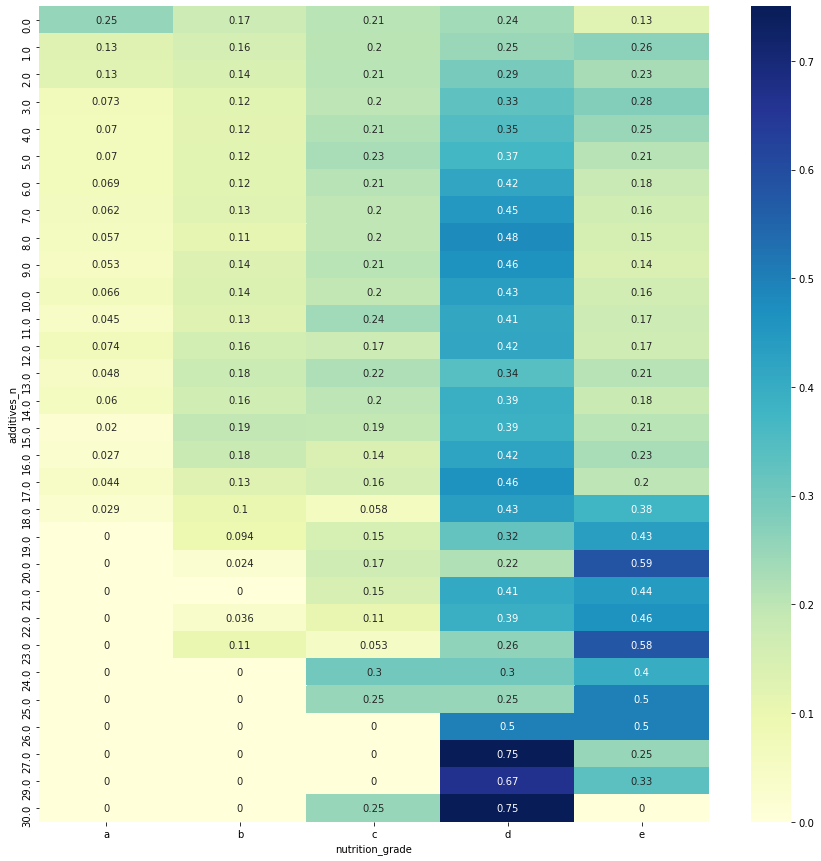

In [1283]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(additives_vs_nutrition_grade, annot = True, cmap="YlGnBu")

Interpretation:

the higher number of additives are associated (not correlated) with the higher nutrition grades, namely the d and e. More specificaly the very high number of additives > 26 are associated with the degree d. Products with 19-22 number of additives are associated with the nutrition grade e.

_Questions:  Correlation measures a linear relation (or lack of it) but the frequency table (contigency table) is not exactly the correlation. So I try to calculate the correlation but I am not sure if this way is meaningful._
1. How I can correlate a numerical and a categorical (ordinal/nominal) variable?
2. How I can correlate categorical (ordinal/nominal) variables?

As references I read the following articles, which I would like to discuss with you:

https://stats.stackexchange.com/questions/187820/correlation-between-numerical-and-categorical-data-in-r
After finishing the exercise I stepped upon the following article as well (but not going deep):
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
and
https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

I try to address the same question with one-hot encoding and the correlation matrix (I do not know if it is correct)

In [ ]:
additives_ohe = pd.get_dummies(additives[['nutrition_grade', 'additives_n']])
additives_ohe.corr()

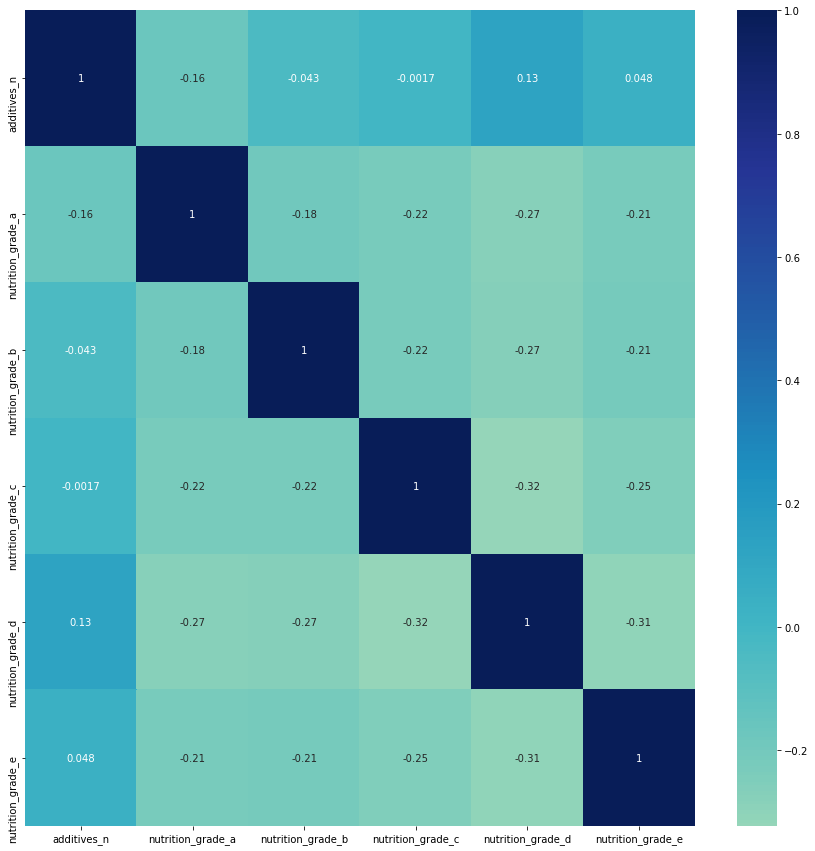

In [1137]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(additives_ohe.corr(), annot = True, cmap="YlGnBu", center = 0)

it looks like the number of additives is slightly correlated with the nutrition grade d.

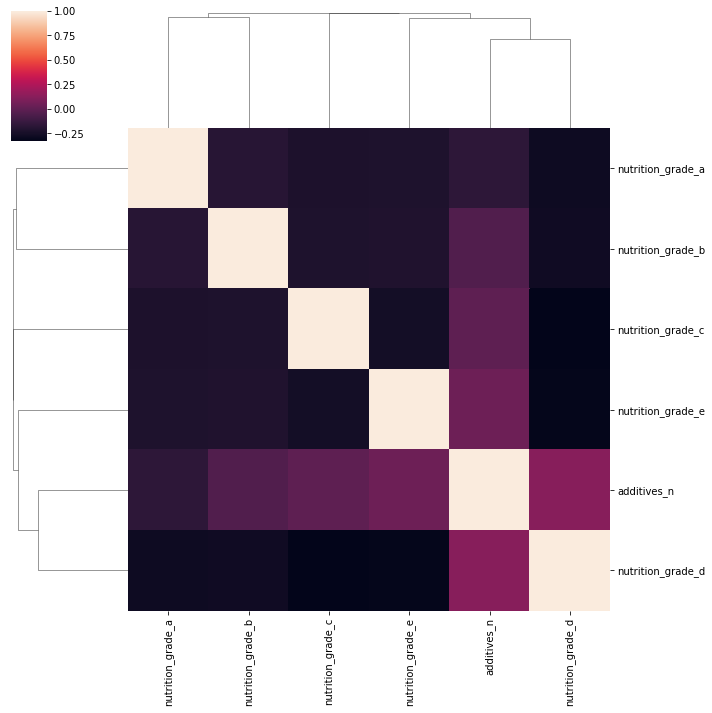

In [1138]:
sns.clustermap(additives_ohe.corr(), figsize = (10,10));

The clustering map is not very clear to me. therfore I would like to discuss it with you.

### 2. What product category is most prone to having many additives?

Relevant columns: 'pnns' and 'additives_n'

First off, I have to clean the data frame column 'pnns' because for example the 'Sugary snacks' and 'sugary-snacks' should be in the same category. That holds for other entries as well. So some text manipulation is required.

In [1139]:
food.pnns.value_counts()

unknown                    36463
Sugary snacks              13881
Beverages                  12344
Milk and dairy products    10052
Cereals and potatoes        9507
Fish Meat Eggs              8747
Composite foods             7639
Fat and sauces              6593
Fruits and vegetables       6304
Salty snacks                3124
fruits-and-vegetables       1034
sugary-snacks                584
cereals-and-potatoes          19
salty-snacks                   1
Name: pnns, dtype: int64

In [1140]:
def  transform(s):
    s = s.str.lower()
    s = s.str.replace('-', ' ')
    return(s)

In [1141]:
food.pnns = transform(food.pnns)

In [1142]:
food.pnns.value_counts()

unknown                    36463
sugary snacks              14465
beverages                  12344
milk and dairy products    10052
cereals and potatoes        9526
fish meat eggs              8747
composite foods             7639
fruits and vegetables       7338
fat and sauces              6593
salty snacks                3125
Name: pnns, dtype: int64

In [1143]:
food.shape

(307069, 28)

I will slice and clean the food dataframe in order not to have NaN values or values that do not represent a food category (unknown). 

In [1144]:
# product_cat = food.loc[(food.pnns != 'unknown'),:]
product_cat = food[(food.pnns != 'unknown')]
product_cat.shape

(270606, 28)

In [1145]:
product_cat.pnns.isna().sum()

190777

In [1146]:
270606-190777

79829

In [1147]:
product_cat.pnns.value_counts()

sugary snacks              14465
beverages                  12344
milk and dairy products    10052
cereals and potatoes        9526
fish meat eggs              8747
composite foods             7639
fruits and vegetables       7338
fat and sauces              6593
salty snacks                3125
Name: pnns, dtype: int64

I drop the missing values on the product category

In [1148]:
product_cat = product_cat.dropna(subset = ['pnns'])
product_cat.shape

(79829, 28)

In [1149]:
product_cat = product_cat[['code', 'pnns', 'additives_n']]

In [1150]:
# porduct_cat.pnns = pd.Categorical(.)
product_cat.pnns = product_cat.pnns.astype('category')
product_cat.dtypes

code             object
pnns           category
additives_n     float64
dtype: object

In [1151]:
product_cat.pnns = transform(product_cat.pnns)

In [1152]:
product_cat.pnns.value_counts()

sugary snacks              14465
beverages                  12344
milk and dairy products    10052
cereals and potatoes        9526
fish meat eggs              8747
composite foods             7639
fruits and vegetables       7338
fat and sauces              6593
salty snacks                3125
Name: pnns, dtype: int64

Now, like before, I plot the correlation matrix (heatmap) after applying one-hot-encoding

In [1153]:
product_vs_additives = pd.get_dummies(product_cat[['pnns', 'additives_n']])
product_vs_additives.corr()

,additives_n,pnns_beverages,pnns_cereals and potatoes,pnns_composite foods,pnns_fat and sauces,pnns_fish meat eggs,pnns_fruits and vegetables,pnns_milk and dairy products,pnns_salty snacks,pnns_sugary snacks
additives_n,1.000000,-0.075251,-0.103724,0.157379,-0.052041,0.016251,-0.153610,-0.014910,-0.023547,0.200998
pnns_beverages,-0.075251,1.000000,-0.157432,-0.139125,-0.128323,-0.150029,-0.136073,-0.162328,-0.086326,-0.201194
pnns_cereals and potatoes,-0.103724,-0.157432,1.000000,-0.119742,-0.110445,-0.129127,-0.117116,-0.139714,-0.074299,-0.173164
pnns_composite foods,0.157379,-0.139125,-0.119742,1.000000,-0.097602,-0.114112,-0.103497,-0.123467,-0.065659,-0.153028
pnns_fat and sauces,-0.052041,-0.128323,-0.110445,-0.097602,1.000000,-0.105252,-0.095461,-0.113880,-0.060561,-0.141146
pnns_fish meat eggs,0.016251,-0.150029,-0.129127,-0.114112,-0.105252,1.000000,-0.111608,-0.133143,-0.070805,-0.165021
pnns_fruits and vegetables,-0.153610,-0.136073,-0.117116,-0.103497,-0.095461,-0.111608,1.000000,-0.120758,-0.064219,-0.149671
pnns_milk and dairy products,-0.014910,-0.162328,-0.139714,-0.123467,-0.113880,-0.133143,-0.120758,1.000000,-0.076610,-0.178550
pnns_salty snacks,-0.023547,-0.086326,-0.074299,-0.065659,-0.060561,-0.070805,-0.064219,-0.076610,1.000000,-0.094952
pnns_sugary snacks,0.200998,-0.201194,-0.173164,-0.153028,-0.141146,-0.165021,-0.149671,-0.178550,-0.094952,1.000000


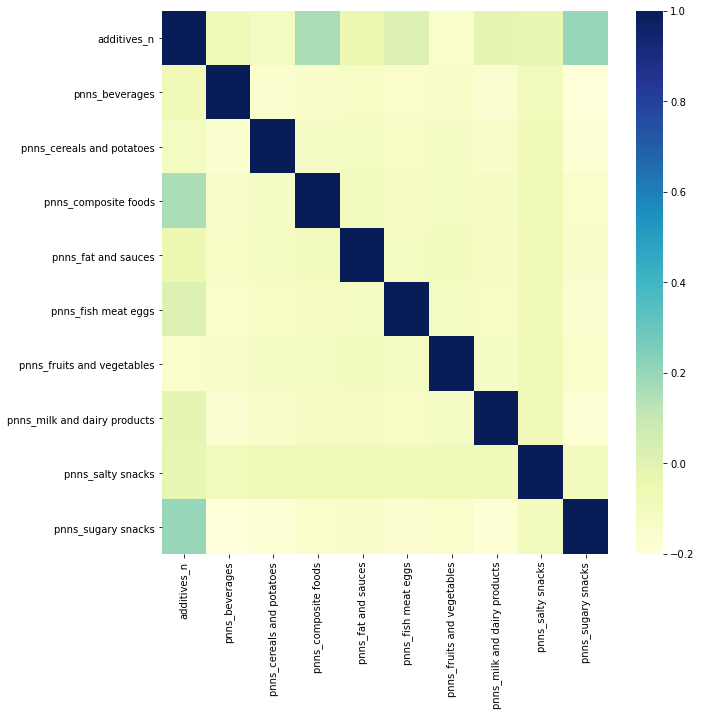

In [1154]:
fig, ax = plt.subplots(
   nrows = 1 , ncols = 1,  figsize=(10, 10)
)
ax = sns.heatmap(product_vs_additives.corr(), annot =False, cmap="YlGnBu")

Here I see that the number of additives is correlated mostly with the sugary_snacks and composite foods. Again here the same questions that I mentioned before are relevant as well.

I want to get my cleaned dataset in a tabular view (frequency table)

In [1155]:
product_cat = product_cat[['code', 'pnns', 'additives_n']]
product_additives_piv = product_cat.pivot_table(index = 'pnns', columns = 'additives_n', values = 'code', aggfunc = len)
product_additives_piv

additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,26.0,30.0
pnns,,,,,,,,,,,,,,,,,,,,,,,,,,
beverages,5923.0,1836.0,1148.0,770.0,523.0,386.0,195.0,144.0,87.0,40.0,23.0,5.0,5.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cereals and potatoes,5377.0,1188.0,704.0,428.0,297.0,180.0,92.0,78.0,46.0,47.0,28.0,8.0,6.0,4.0,7.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
composite foods,2052.0,1127.0,909.0,678.0,569.0,435.0,347.0,257.0,189.0,157.0,97.0,80.0,58.0,35.0,39.0,29.0,7.0,3.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
fat and sauces,3292.0,877.0,688.0,397.0,275.0,215.0,141.0,92.0,32.0,12.0,6.0,5.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
fish meat eggs,3355.0,979.0,1439.0,910.0,583.0,322.0,246.0,147.0,95.0,49.0,25.0,14.0,6.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
fruits and vegetables,4563.0,1443.0,651.0,150.0,42.0,22.0,18.0,12.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
milk and dairy products,4853.0,1180.0,708.0,615.0,473.0,396.0,282.0,196.0,115.0,74.0,41.0,30.0,20.0,16.0,11.0,9.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salty snacks,1508.0,391.0,248.0,266.0,184.0,85.0,72.0,38.0,24.0,18.0,4.0,5.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sugary snacks,2765.0,3162.0,1888.0,1592.0,1108.0,783.0,526.0,371.0,297.0,177.0,144.0,100.0,65.0,54.0,60.0,25.0,30.0,22.0,11.0,7.0,4.0,1.0,2.0,NaN,2.0,3.0


another way to view this, is the following (the attribute normalize is applied here row-wise)

In [1156]:
product_additives = product_cat.groupby('pnns').additives_n.value_counts().unstack().fillna(0)
product_additives

additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,26.0,30.0
pnns,,,,,,,,,,,,,,,,,,,,,,,,,,
beverages,5923.0,1836.0,1148.0,770.0,523.0,386.0,195.0,144.0,87.0,40.0,23.0,5.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cereals and potatoes,5377.0,1188.0,704.0,428.0,297.0,180.0,92.0,78.0,46.0,47.0,28.0,8.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
composite foods,2052.0,1127.0,909.0,678.0,569.0,435.0,347.0,257.0,189.0,157.0,97.0,80.0,58.0,35.0,39.0,29.0,7.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
fat and sauces,3292.0,877.0,688.0,397.0,275.0,215.0,141.0,92.0,32.0,12.0,6.0,5.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fish meat eggs,3355.0,979.0,1439.0,910.0,583.0,322.0,246.0,147.0,95.0,49.0,25.0,14.0,6.0,5.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
fruits and vegetables,4563.0,1443.0,651.0,150.0,42.0,22.0,18.0,12.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
milk and dairy products,4853.0,1180.0,708.0,615.0,473.0,396.0,282.0,196.0,115.0,74.0,41.0,30.0,20.0,16.0,11.0,9.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
salty snacks,1508.0,391.0,248.0,266.0,184.0,85.0,72.0,38.0,24.0,18.0,4.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sugary snacks,2765.0,3162.0,1888.0,1592.0,1108.0,783.0,526.0,371.0,297.0,177.0,144.0,100.0,65.0,54.0,60.0,25.0,30.0,22.0,11.0,7.0,4.0,1.0,2.0,0.0,2.0,3.0


exploring other ways of generationg the same result.

In [1157]:
product_additives_ft = product_additives.div(product_additives.sum(axis=1), axis=0).fillna(0)
product_additives_ft

additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,26.0,30.0
pnns,,,,,,,,,,,,,,,,,,,,,,,,,,
beverages,0.534181,0.165584,0.103535,0.069444,0.047168,0.034812,0.017587,0.012987,0.007846,0.003608,0.002074,0.000451,0.000451,0.000180,0.000090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cereals and potatoes,0.632961,0.139847,0.082872,0.050383,0.034962,0.021189,0.010830,0.009182,0.005415,0.005533,0.003296,0.000942,0.000706,0.000471,0.000824,0.000353,0.000118,0.000118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
composite foods,0.290117,0.159338,0.128517,0.095857,0.080447,0.061501,0.049060,0.036335,0.026721,0.022197,0.013714,0.011311,0.008200,0.004948,0.005514,0.004100,0.000990,0.000424,0.000424,0.000141,0.000000,0.000141,0.000000,0.000000,0.000000,0.000000
fat and sauces,0.544672,0.145103,0.113832,0.065685,0.045500,0.035572,0.023329,0.015222,0.005295,0.001985,0.000993,0.000827,0.001489,0.000331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165,0.000000,0.000000
fish meat eggs,0.409996,0.119638,0.175852,0.111206,0.071245,0.039350,0.030062,0.017964,0.011609,0.005988,0.003055,0.001711,0.000733,0.000611,0.000244,0.000122,0.000367,0.000000,0.000000,0.000000,0.000122,0.000122,0.000000,0.000000,0.000000,0.000000
fruits and vegetables,0.660825,0.208979,0.094280,0.021723,0.006083,0.003186,0.002607,0.001738,0.000145,0.000290,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
milk and dairy products,0.537729,0.130748,0.078449,0.068144,0.052410,0.043878,0.031247,0.021717,0.012742,0.008199,0.004543,0.003324,0.002216,0.001773,0.001219,0.000997,0.000443,0.000111,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
salty snacks,0.529680,0.137338,0.087109,0.093432,0.064629,0.029856,0.025290,0.013347,0.008430,0.006322,0.001405,0.001756,0.000702,0.000351,0.000351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sugary snacks,0.209486,0.239564,0.143041,0.120615,0.083946,0.059323,0.039852,0.028108,0.022502,0.013410,0.010910,0.007576,0.004925,0.004091,0.004546,0.001894,0.002273,0.001667,0.000833,0.000530,0.000303,0.000076,0.000152,0.000000,0.000152,0.000227


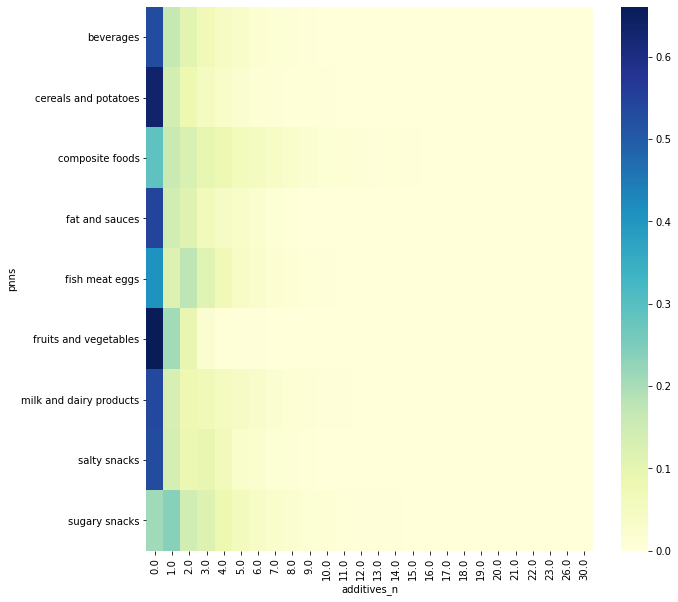

In [1158]:
fig, ax = plt.subplots(
   nrows = 1 , ncols = 1,  figsize=(10, 10)
)
ax = sns.heatmap(product_additives_ft, annot =False, cmap="YlGnBu")

interpretation

From this frequency table I see a high association of fruits and vegetables with the abscence of additives. Then follow the cereals and potatoes. This result is not aligned with the previous one and therefore is confusing.

### 3. Are there countries with more or less risky additives? This additional list may help.

the relevat columns to answer this question are: code, countries, additives_en. I will create a new column based on the additives_en which will have identify whether the product has risky product or not based on the definition from the given link.  

The following additives are according to the list have a high risk of overexposure.

In [1159]:
risky_additives_list = pd.Series(['E202 - Potassium sorbate',
'E407 - Carrageenan',
'E450 - Diphosphates',
'E250 - Sodium nitrite',
'E150c - Ammonia caramel',
'E341 - Calcium phosphates',
'E211 - Sodium benzoate',
'E621 - Monosodium glutamate',
'E200 - Sorbic acid',
'E481 - Sodium stearoyl-2-lactylate',
'E452 - Polyphosphates',
'E340 - Potassium phosphates',
'E223 - Sodium metabisulphite',
'E338 - Phosphoric acid',
'E451 - Triphosphates',
'E150a - Plain caramel',
'E220 - Sulphur dioxide',
'E252 - Potassium nitrate',
'E212 - Potassium benzoate',
'E339 - Sodium phosphates',
'E224 - Potassium metabisulphite',
'E150d - Sulphite ammonia caramel',
'E491 - Sorbitan monostearate',
'E222 - Sodium bisulphite',
'E251 - Sodium nitrate',
'E407a - Processed eucheuma seaweed',
'E492 - Sorbitan tristearate',
'E221 - Sodium sulphite',
'E473 - Sucrose esters of fatty acids',
'E343 - Magnesium phosphates',
'E210 - Benzoic acid',
'E482 - Calcium stearoyl-2-lactylate',
'E228 - Potassium bisulphite',
'E155 - Brown ht',
'E243 - Ethyl lauroyl arginate',
'E226 - Calcium sulphite',
'E494 - Sorbitan monooleate',
'E459 - Beta-cyclodextrine',
'E493 - Sorbitan monolaurate',
'E213 - Calcium benzoate'])

In [1160]:
food.shape

(307069, 28)

In [1161]:
risky_additives = risky_additives_list.str.extract('(^E[0-9][0-9][0-9][acd]?)')
risky_additives[0]

0      E202
1      E407
2      E450
3      E250
4     E150c
      ...  
35     E226
36     E494
37     E459
38     E493
39     E213
Name: 0, Length: 40, dtype: object

In [1162]:
additives_per_country = food[['code', 'countries', 'additives_en']].dropna(subset = ['additives_en'])
additives_per_country.head()

,code,countries,additives_en
6,16124,United States,E307c - Tocopherol
20,18289,United States,"E322 - Lecithins,E322i - Lecithin"
22,18340,United States,"E330 - Citric acid,E339 - Sodium phosphates"
23,18357,United States,"E170 - Calcium carbonate,E322 - Lecithins,E322..."
28,18418,United States,E330 - Citric acid


In [1163]:
result = additives_per_country['additives_en'].str.extractall('(E[0-9][0-9][0-9][acd]?)').unstack()
result.head(10)
#df[df.name.str.contains('|'.join(search_values ))]

0                                                                   \
match     0     1     2     3     4     5    6    7    8    9    10   11   12   
6      E307c   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
20      E322  E322   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
22      E330  E339   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23      E170  E322  E322  E410   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
28      E330   NaN   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31      E322  E322   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32      E322  E322   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
42      E322  E322   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
45      E142  E450  E472  E472  E475  E481  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
59      E160  E422   NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                                             \
match   13   14   15   16   17   18   19   20   21   22   23   24   25   26   
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
20     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
22     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
28     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
42     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
45     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
59     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                          
match   27   28   29   30   31   32   33  
6      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
20     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
22     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
23     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
28     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
31     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
32     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
45     NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59     NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [1164]:
additives_per_country['risky_additives'] = additives_per_country['additives_en'].str.contains('|'.join(risky_additives[0]))

In [1165]:
additives_per_country.shape

(168981, 4)

In [1166]:
additives_per_country.head()

,code,countries,additives_en,risky_additives
6,16124,United States,E307c - Tocopherol,False
20,18289,United States,"E322 - Lecithins,E322i - Lecithin",False
22,18340,United States,"E330 - Citric acid,E339 - Sodium phosphates",True
23,18357,United States,"E170 - Calcium carbonate,E322 - Lecithins,E322...",False
28,18418,United States,E330 - Citric acid,False


In [1167]:
additives_per_country.countries.value_counts().nunique()

56

I choose the first 6 countires which have more than 1000 entries

In [1168]:
df_countries = additives_per_country.countries.value_counts().head(10).to_frame().reset_index()
df_countries.head(32)

,index,countries
0,United States,111615
1,France,44118
2,Switzerland,3651
3,Germany,1873
4,Spain,1611
5,United Kingdom,1047
6,"France,Switzerland",681
7,"Belgium,France",403
8,Belgium,355
9,Portugal,241


In [1169]:
additives_per_country.countries.value_counts().tail(20)

Kenya                                                                                                                                                          1
Belgium,France,Spain                                                                                                                                           1
Algeria,Belgium,Egypt,France,Morocco,Qatar,Switzerland,Tunisia,United Arab Emirates                                                                            1
France,Norway                                                                                                                                                  1
Singapore,United States                                                                                                                                        1
Austria,Germany,Switzerland                                                                                                                                    1
French Polynesia,Switzerland      

In [1170]:
additives_per_country.head()

,code,countries,additives_en,risky_additives
6,16124,United States,E307c - Tocopherol,False
20,18289,United States,"E322 - Lecithins,E322i - Lecithin",False
22,18340,United States,"E330 - Citric acid,E339 - Sodium phosphates",True
23,18357,United States,"E170 - Calcium carbonate,E322 - Lecithins,E322...",False
28,18418,United States,E330 - Citric acid,False


In [1171]:
countries = ['United States', 'France', 'Switzerland', 'Spain', 'United Kingdom']
countries

['United States', 'France', 'Switzerland', 'Spain', 'United Kingdom']

In [1172]:
sol = additives_per_country[additives_per_country['countries'].isin(countries)]
sol.countries.value_counts()

United States     111615
France             44118
Switzerland         3651
Spain               1611
United Kingdom      1047
Name: countries, dtype: int64

Since there are many entries for both Swistzerland and France (France,Switzerland) I will consider that these entries count for both countries

In [1173]:
swiss_french = additives_per_country[additives_per_country['countries'] == 'France,Switzerland']
swiss_french.head()

,code,countries,additives_en,risky_additives
11051,14100096986,"France,Switzerland","E101 - Riboflavin,E101i - Riboflavin,E150d - S...",True
11052,14100096993,"France,Switzerland","E101 - Riboflavin,E101i - Riboflavin,E322 - Le...",False
11053,14100097006,"France,Switzerland","E101 - Riboflavin,E101i - Riboflavin,E322 - Le...",False
35158,39047005440,"France,Switzerland","E170 - Calcium carbonate,E322 - Lecithins,E322...",True
57111,46000815213,"France,Switzerland",E330 - Citric acid,False


In [1174]:
swiss = swiss_french.copy()
french = swiss_french.copy()

In [1175]:
sol.shape

(162042, 4)

In [1176]:
swiss.countries = 'Switzerland'
french.countries = 'France'

In [1177]:
top_5_countries = pd.concat([sol, swiss, french])

In [1178]:
top_5_countries

,code,countries,additives_en,risky_additives
6,16124,United States,E307c - Tocopherol,False
20,18289,United States,"E322 - Lecithins,E322i - Lecithin",False
22,18340,United States,"E330 - Citric acid,E339 - Sodium phosphates",True
23,18357,United States,"E170 - Calcium carbonate,E322 - Lecithins,E322...",False
28,18418,United States,E330 - Citric acid,False
...,...,...,...,...
305850,90162800,France,"E101 - Riboflavin,E950 - Acesulfame k,E951 - A...",False
305932,90494758,France,"E300 - Ascorbic acid,E330 - Citric acid,E331 -...",False
306911,9555022300009,France,"E452 - Polyphosphates,E501 - Potassium carbona...",True
306912,9555022300016,France,"E452 - Polyphosphates,E501 - Potassium carbona...",True


In [1179]:
ct = pd.crosstab(top_5_countries.countries, top_5_countries.risky_additives, normalize = 'index')
ct

risky_additives,False,True
countries,,
France,0.554387,0.445613
Spain,0.579143,0.420857
Switzerland,0.633887,0.366113
United Kingdom,0.612225,0.387775
United States,0.623913,0.376087


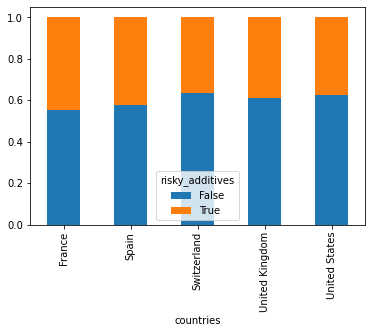

In [1180]:
ct.plot.bar(stacked = True)

plt.show()

I observe that with a percentage between 36% and 45% have the products that come from each of these top 5 countries have additives. Switzerland seems to be the winner in this with only 36% of its product entail additives and French products are the ones with the highest percentage of additives. The difference though is not significant.

# C. Text data
You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients. Be careful with text normalization:

punctuation e.g. "water." vs"water"`
capitalization e.g. "water" vs "Water"
white spaces removal e.g. " water" vs "water"

I remove the . at the end (fullstop)

In [1181]:
import re

In [1182]:
food['ingredients_text'] = food['ingredients_text'].str.lower().str.replace('\.$', '')
food['ingredients_text']

0         bananas, vegetable oil (coconut oil, corn oil ...
1         peanuts, wheat flour, sugar, rice flour, tapio...
2         organic hazelnuts, organic cashews, organic wa...
3                                           organic polenta
4         rolled oats, grape concentrate, expeller press...
                                ...                        
307064                                                 miel
307065    thé vert, arôme naturel bergamote avec autres ...
307066    viande d'oie, graisse de canard, épices, sel, ...
307067    organic peppermint, organic lemon grass, organ...
307068    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 307069, dtype: object

I make them all lowercase

In [1183]:
food['ingredients_text'] = food['ingredients_text'].str.lower()

remove trailing and leading spaces

In [1184]:
food['ingredients_text'] = food['ingredients_text'].str.strip()

In [1185]:
#food['ingredients_text'].value_counts()

I split with ',' so that each element of the ingredient list is saved in a separate column

In [1186]:
df = food['ingredients_text'].str.split(',', expand = True)

In [1187]:
df.shape

(307069, 169)

In [1188]:
df[0]

0                    bananas
1                    peanuts
2          organic hazelnuts
3            organic polenta
4                rolled oats
                 ...        
307064                  miel
307065              thé vert
307066          viande d'oie
307067    organic peppermint
307068           citric acid
Name: 0, Length: 307069, dtype: object

for each product, I take the first 10 elements of the ingredients_text list into account.

In [1189]:
ingredients = df[0]
for i in range(1,10):
    ingredients.append(df[i])

ingredients.head(20)

0                                        bananas
1                                        peanuts
2                              organic hazelnuts
3                                organic polenta
4                                    rolled oats
5                  organic long grain white rice
6                                       org oats
7                       organic chocolate liquor
8                       organic expeller pressed
9                           organic adzuki beans
10    organic refined durum semolina wheat flour
11                      roasted peanuts (peanuts
12                     organic golden flax seeds
13             organic dry roasted pumpkin seeds
14                           organic rolled oats
15                         organic raw hazelnuts
16                               organic bananas
17                    organic brown jasmine rice
18                            organic oat groats
19                                yogurt raisins
Name: 0, dtype: obje

I remove the leading spaces

In [1190]:
# re.sub(r"^\s+", "", s), sep='') 
#  re.sub(r"\s+$", "", s), sep='')  
# re.sub(r"^\s+|\s+$", "", s), sep='')  # | for OR condition
ingredients.str.strip()

0                    bananas
1                    peanuts
2          organic hazelnuts
3            organic polenta
4                rolled oats
                 ...        
307064                  miel
307065              thé vert
307066          viande d'oie
307067    organic peppermint
307068           citric acid
Name: 0, Length: 307069, dtype: object

I replace a few words that are in french with the equivalent in englich as well as some syntax errors

In [1191]:
ingredients.replace('eau', 'water', inplace = True)
ingredients.replace('sucre', 'sugar', inplace = True)
ingredients.replace('farine de _blé_', 'farine de blé', inplace = True)

In [1192]:
ingredients.value_counts().sort_values(ascending= False).head(10)

sugar                          15357
water                          14959
carbonated water                3480
farine de blé                   2803
filtered water                  2778
corn syrup                      2305
potatoes                        2090
enriched flour (wheat flour     2077
pork                            1821
milk                            1816
Name: 0, dtype: int64

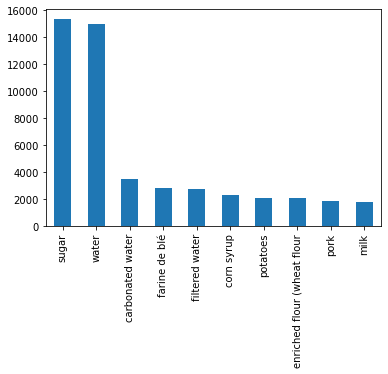

In [1193]:
ingredients.value_counts().sort_values(ascending= False).head(10).plot.bar()

# D. Time-series analysis
You will investigate more closely the created_datetime and last_modified_datetime. First, you will analyze the mean time difference between these two values. And second, you will analyze the total number of items created each month over the full timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

In [1194]:
food_copy = food.copy()

In [1195]:
food.tail()

,code,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,countries,ingredients_text,additives_n,additives_en,nutrition_grade,pnns,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
307064,9900010011557,1375778997,2013-08-06T08:49:57Z,1504698840,2017-09-06T11:54:00Z,Miel de Camargue,France,miel,0.0,NaN,NaN,sugary snacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307065,99111250,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,France,"thé vert, arôme naturel bergamote avec autres ...",0.0,NaN,NaN,beverages,21.0,0.2,0.2,NaN,NaN,0.5,0.5,0.2,0.5,0.0254,0.01,NaN,NaN,NaN,NaN,NaN
307066,9935010000003,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,France,"viande d'oie, graisse de canard, épices, sel, ...",0.0,NaN,NaN,fish meat eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307067,99567453,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",United States,"organic peppermint, organic lemon grass, organ...",0.0,NaN,b,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0
307068,999990026839,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",United States,"citric acid, maltodextrin, instant tea, aspart...",7.0,"E102 - Tartrazine,E129 - Allura red ac,E150a -...",NaN,NaN,2092.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN


In [1196]:
dates = food[['code','created_datetime', 'last_modified_datetime']]
dates.head(10)

,code,created_datetime,last_modified_datetime
0,4530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
1,4559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,16087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
3,16094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
4,16100,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
5,161177,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z
6,16124,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z
7,16193,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
8,16513,2017-03-09T10:34:14Z,2017-03-09T10:34:14Z
9,16612,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z


In [1197]:
dates['created_datetime'].isnull().sum()

1

In [1198]:
dates['last_modified_datetime'].isnull().sum()

0

In [1199]:
dates[dates['created_datetime'].isna()]

,code,created_datetime,last_modified_datetime
181833,3017760038409,NaN,2017-03-08T16:54:15Z


In [1200]:
dates = dates.dropna(subset =['created_datetime'] )

In [1201]:
dates.head()

,code,created_datetime,last_modified_datetime
0,4530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
1,4559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,16087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
3,16094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
4,16100,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z


In [1202]:
pd.to_datetime(dates['created_datetime'], format="%Y-%m-%d %H:%M:%S")
pd.to_datetime(dates['last_modified_datetime'], format="%Y-%m-%d %H:%M:%S")

0        2017-03-09 14:32:37+00:00
1        2017-03-09 14:32:37+00:00
2        2017-03-09 10:35:31+00:00
3        2017-03-09 10:34:13+00:00
4        2017-03-09 10:34:11+00:00
                    ...           
307064   2017-09-06 11:54:00+00:00
307065   2013-06-20 01:09:16+00:00
307066   2015-11-01 11:20:39+00:00
307067   2017-04-03 18:34:59+00:00
307068   2017-04-03 18:34:59+00:00
Name: last_modified_datetime, Length: 307068, dtype: datetime64[ns, UTC]

In [1203]:
dates.head()

,code,created_datetime,last_modified_datetime
0,4530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
1,4559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,16087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
3,16094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
4,16100,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z


In [1204]:
for i in range(dates.shape[1]):
    print(i,set(map(type, dates.iloc[:,i])), '--------->' , dates.columns[i])

0 {<class 'int'>, <class 'float'>, <class 'str'>} ---------> code
1 {<class 'str'>} ---------> created_datetime
2 {<class 'str'>} ---------> last_modified_datetime


not needed: I have to clean the dataframe dates i.e. to remove the T and Z from the dates in ordet to transform them to datatime objects

In [1205]:
res1 = dates['created_datetime'].str.extract('(\d\d\d\d-\d\d-\d\d)T(\d\d:\d\d:\d\d)Z')
res1.head()

,0,1
0,2017-03-09,14:32:37
1,2017-03-09,14:32:37
2,2017-03-09,10:35:31
3,2017-03-09,10:34:13
4,2017-03-09,10:34:11


In [1206]:
res2 = dates['last_modified_datetime'].str.extract('(\d\d\d\d-\d\d-\d\d)T(\d\d:\d\d:\d\d)Z')
res2.head()

,0,1
0,2017-03-09,14:32:37
1,2017-03-09,14:32:37
2,2017-03-09,10:35:31
3,2017-03-09,10:34:13
4,2017-03-09,10:34:11


In [1207]:
dates.loc[:,'created_datetime'] = res1[0] + " " + res1[1]
dates['created_datetime'].tail()

307064    2013-08-06 08:49:57
307065    2013-04-28 15:30:39
307066    2015-10-31 12:07:09
307067    2017-03-09 11:31:16
307068    2017-03-09 15:18:29
Name: created_datetime, dtype: object

In [1208]:
dates.loc[:,'last_modified_datetime'] = res2[0] + " " +res2[1]
dates['last_modified_datetime'].tail()

307064    2017-09-06 11:54:00
307065    2013-06-20 01:09:16
307066    2015-11-01 11:20:39
307067    2017-04-03 18:34:59
307068    2017-04-03 18:34:59
Name: last_modified_datetime, dtype: object

In [1209]:
dates.head()

,code,created_datetime,last_modified_datetime
0,4530,2017-03-09 14:32:37,2017-03-09 14:32:37
1,4559,2017-03-09 14:32:37,2017-03-09 14:32:37
2,16087,2017-03-09 10:35:31,2017-03-09 10:35:31
3,16094,2017-03-09 10:34:13,2017-03-09 10:34:13
4,16100,2017-03-09 10:34:11,2017-03-09 10:34:11


I check the datatypes

I would have expected to get the output as datetime64 and not as string. Why?
I try another way

In [1210]:
dates['date'] = dates['created_datetime'].apply(pd.to_datetime)
dates.head()

,code,created_datetime,last_modified_datetime,date
0,4530,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37
1,4559,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37
2,16087,2017-03-09 10:35:31,2017-03-09 10:35:31,2017-03-09 10:35:31
3,16094,2017-03-09 10:34:13,2017-03-09 10:34:13,2017-03-09 10:34:13
4,16100,2017-03-09 10:34:11,2017-03-09 10:34:11,2017-03-09 10:34:11


In [1211]:
dates['date_modification'] = dates['last_modified_datetime'].apply(pd.to_datetime)

In [1212]:
dates.dtypes

code                              object
created_datetime                  object
last_modified_datetime            object
date                      datetime64[ns]
date_modification         datetime64[ns]
dtype: object

In [1213]:
for i in range(dates.shape[1]):
    print(i,set(map(type, dates.iloc[:,i])), '--------->' , dates.columns[i])

0 {<class 'int'>, <class 'float'>, <class 'str'>} ---------> code
1 {<class 'str'>} ---------> created_datetime
2 {<class 'str'>} ---------> last_modified_datetime
3 {<class 'pandas._libs.tslibs.timestamps.Timestamp'>} ---------> date
4 {<class 'pandas._libs.tslibs.timestamps.Timestamp'>} ---------> date_modification


Why doesn't it work with the existing columns? I have to create new ones to see the Timestamp data type. I do not understand this.

In [1215]:
dates['datetime_difference'] = (dates['date_modification'] - dates['date'])

In [1216]:
dates.sample(10)

,code,created_datetime,last_modified_datetime,date,date_modification,datetime_difference
189697,3144550011288,2015-03-23 17:46:27,2015-03-23 17:48:37,2015-03-23 17:46:27,2015-03-23 17:48:37,0 days 00:02:10
237293,3560070728503,2016-01-27 18:33:53,2016-01-27 20:12:58,2016-01-27 18:33:53,2016-01-27 20:12:58,0 days 01:39:05
135794,741459270728,2017-03-09 20:39:36,2017-03-09 20:39:36,2017-03-09 20:39:36,2017-03-09 20:39:36,0 days 00:00:00
115168,609454642967,2017-03-09 16:02:42,2017-03-09 16:02:42,2017-03-09 16:02:42,2017-03-09 16:02:42,0 days 00:00:00
286515,7613312050217,2017-02-07 23:15:05,2017-02-16 15:02:20,2017-02-07 23:15:05,2017-02-16 15:02:20,8 days 15:47:15
152098,835143010810,2017-03-09 16:25:38,2017-03-09 16:25:39,2017-03-09 16:25:38,2017-03-09 16:25:39,0 days 00:00:01
206302,3256224200031,2013-04-03 17:25:17,2017-03-19 11:51:32,2013-04-03 17:25:17,2017-03-19 11:51:32,1445 days 18:26:15
165080,867350000001,2017-03-09 16:39:16,2017-03-09 16:39:16,2017-03-09 16:39:16,2017-03-09 16:39:16,0 days 00:00:00
143806,793573212481,2017-03-10 08:25:13,2017-03-10 08:25:13,2017-03-10 08:25:13,2017-03-10 08:25:13,0 days 00:00:00
286682,7613312086513,2017-02-07 22:18:01,2017-02-07 22:18:02,2017-02-07 22:18:01,2017-02-07 22:18:02,0 days 00:00:01


In [1217]:
dates['datetime_difference'].unique()

array([               0,       1000000000,       2000000000, ...,
         83610000000000, 2185423000000000, 2171790000000000],
      dtype='timedelta64[ns]')

In [1218]:
dates['datetime_difference'].nunique()

96681

In [1219]:
dates['datetime_difference'].nsmallest()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: datetime_difference, dtype: timedelta64[ns]

In [1220]:
dates['datetime_difference'].nlargest()

203760   2033 days 13:40:59
292077   2021 days 10:24:24
185277   2015 days 05:45:37
213653   2000 days 20:32:23
183893   2000 days 05:55:03
Name: datetime_difference, dtype: timedelta64[ns]

the total mean accross the whole timeline

In [1221]:
dates['datetime_difference'].mean()

Timedelta('112 days 03:04:10.034612')

In [1222]:
dates['mean_time_difference'] = (dates['datetime_difference']/(dates['datetime_difference'].mean())).round(3)

In [1223]:
dates.head()

,code,created_datetime,last_modified_datetime,date,date_modification,datetime_difference,mean_time_difference
0,4530,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days,0.0
1,4559,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days,0.0
2,16087,2017-03-09 10:35:31,2017-03-09 10:35:31,2017-03-09 10:35:31,2017-03-09 10:35:31,0 days,0.0
3,16094,2017-03-09 10:34:13,2017-03-09 10:34:13,2017-03-09 10:34:13,2017-03-09 10:34:13,0 days,0.0
4,16100,2017-03-09 10:34:11,2017-03-09 10:34:11,2017-03-09 10:34:11,2017-03-09 10:34:11,0 days,0.0


In [1224]:
dates.sample(20)

,code,created_datetime,last_modified_datetime,date,date_modification,datetime_difference,mean_time_difference
152240,836093010028,2017-03-10 11:08:38,2017-03-10 11:08:38,2017-03-10 11:08:38,2017-03-10 11:08:38,0 days 00:00:00,0.000
189676,3144550005805,2017-04-30 11:51:36,2017-05-16 17:35:44,2017-04-30 11:51:36,2017-05-16 17:35:44,16 days 05:44:08,0.145
270267,5060088701201,2017-07-25 14:55:03,2017-07-25 14:55:06,2017-07-25 14:55:03,2017-07-25 14:55:06,0 days 00:00:03,0.000
139969,761720980781,2017-03-09 09:55:13,2017-03-09 09:55:13,2017-03-09 09:55:13,2017-03-09 09:55:13,0 days 00:00:00,0.000
259228,4010355321633,2017-05-13 14:58:04,2017-05-14 07:30:46,2017-05-13 14:58:04,2017-05-14 07:30:46,0 days 16:32:42,0.006
203731,3254474016624,2015-11-07 10:51:54,2015-11-07 12:40:17,2015-11-07 10:51:54,2015-11-07 12:40:17,0 days 01:48:23,0.001
246941,3608580006916,2017-07-08 14:48:48,2017-07-08 14:48:53,2017-07-08 14:48:48,2017-07-08 14:48:53,0 days 00:00:05,0.000
262370,41207017,2017-03-30 21:38:09,2017-03-30 21:48:25,2017-03-30 21:38:09,2017-03-30 21:48:25,0 days 00:10:16,0.000
116976,632181499610,2017-03-09 21:03:19,2017-03-09 21:03:19,2017-03-09 21:03:19,2017-03-09 21:03:19,0 days 00:00:00,0.000
19887,23882197613,2017-03-09 13:52:06,2017-03-09 13:52:06,2017-03-09 13:52:06,2017-03-09 13:52:06,0 days 00:00:00,0.000


Now I will group on a daily mean basis using.

In [1226]:
dates.drop(['created_datetime', 'last_modified_datetime'], axis = 1, inplace = True)

In [1227]:
dates.head()

,code,date,date_modification,datetime_difference,mean_time_difference
0,4530,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days,0.0
1,4559,2017-03-09 14:32:37,2017-03-09 14:32:37,0 days,0.0
2,16087,2017-03-09 10:35:31,2017-03-09 10:35:31,0 days,0.0
3,16094,2017-03-09 10:34:13,2017-03-09 10:34:13,0 days,0.0
4,16100,2017-03-09 10:34:11,2017-03-09 10:34:11,0 days,0.0


In [1228]:
# monthly_data = dates[['date', 'date_modification', 'datetime_difference']]
dates.set_index(['date'], drop = True, inplace = True)
dates.head()

,code,date_modification,datetime_difference,mean_time_difference
date,,,,
2017-03-09 14:32:37,4530,2017-03-09 14:32:37,0 days,0.0
2017-03-09 14:32:37,4559,2017-03-09 14:32:37,0 days,0.0
2017-03-09 10:35:31,16087,2017-03-09 10:35:31,0 days,0.0
2017-03-09 10:34:13,16094,2017-03-09 10:34:13,0 days,0.0
2017-03-09 10:34:11,16100,2017-03-09 10:34:11,0 days,0.0


In [1229]:
dates.index.month
# monthly_data.index.date
# monthly_data.index.time
# monthly_data.index.year

Int64Index([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
            ...
             3,  7, 10,  8,  4,  8,  4, 10,  3,  3],
           dtype='int64', name='date', length=307068)

In [1230]:
by_month = dates.groupby(dates.index.month).mean()
by_month

,mean_time_difference
date,
1,2.539876
2,1.408084
3,0.157084
4,2.725684
5,2.128763
6,2.390106
7,2.118410
8,1.606574
9,2.247372


In [1231]:
list(dates.groupby(dates.index.month))

[(1,
                                code   date_modification datetime_difference  \
  date                                                                         
  2015-01-01 21:17:31          39529 2017-03-09 10:34:12   797 days 13:16:41   
  2017-01-16 22:32:58         290616 2017-01-16 22:42:22     0 days 00:09:24   
  2017-01-15 16:22:50         394710 2017-01-15 17:24:00     0 days 01:01:10   
  2017-01-15 17:32:08        1938067 2017-01-15 18:29:32     0 days 00:57:24   
  2015-01-01 22:09:53        7020254 2017-09-02 18:18:21   974 days 20:08:28   
  ...                            ...                 ...                 ...   
  2015-01-21 01:55:29  9555118659523 2015-01-21 12:11:16     0 days 10:15:47   
  2015-01-25 00:43:08  9556007000365 2015-02-26 01:00:44    32 days 00:17:36   
  2015-01-03 14:50:00       96069868 2015-03-28 13:20:48    83 days 22:30:48   
  2017-01-15 20:48:40       96133262 2017-01-15 20:54:55     0 days 00:06:15   
  2017-01-23 16:57:57  977856431245

In [1232]:
dates.groupby(dates.index.month).get_group((2))

,code,date_modification,datetime_difference,mean_time_difference
date,,,,
2017-02-17 10:05:54,10187319,2017-02-17 10:05:54,0 days 00:00:00,0.000
2015-02-20 19:30:17,2929,2015-02-25 02:01:13,4 days 06:30:56,0.038
2017-02-01 11:13:57,606009841,2017-02-01 11:13:57,0 days 00:00:00,0.000
2015-02-21 14:34:09,11686,2017-06-13 19:23:13,843 days 04:49:04,7.520
2015-02-08 09:53:20,11709,2017-09-13 20:07:57,948 days 10:14:37,8.458
...,...,...,...,...
2017-02-24 18:34:58,9556417639339,2017-03-31 22:18:54,35 days 03:43:56,0.314
2017-02-04 19:19:23,9556587103869,2017-02-06 13:11:54,1 days 17:52:31,0.016
2017-02-28 10:48:20,96060599,2017-02-28 10:48:21,0 days 00:00:01,0.000


In [1233]:
dates.groupby(dates.index.month).mean()

,mean_time_difference
date,
1,2.539876
2,1.408084
3,0.157084
4,2.725684
5,2.128763
6,2.390106
7,2.118410
8,1.606574
9,2.247372


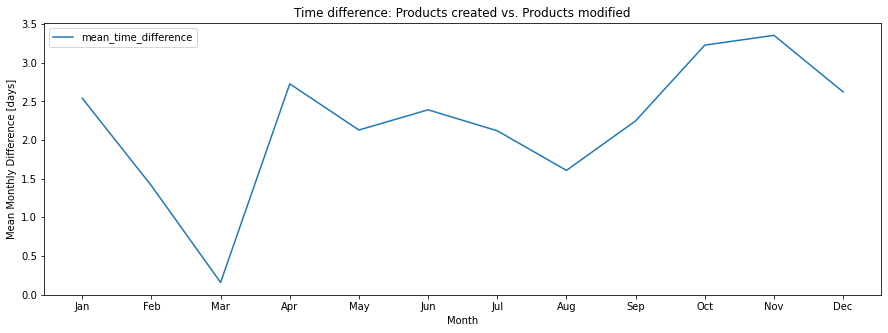

In [1234]:

#plt.figure(figsize=(1,1))
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_ticks = np.arange(12) # 12 ticks (and they are already equally spaced, so not needed)
# monthly_ticks = 2*np.arange(6) # every two months 
by_month.plot(xticks = monthly_ticks, figsize=(15,5))
plt.ylabel("Mean Monthly Difference [days]")
plt.title("Time difference: Products created vs. Products modified")
plt.xlabel("Month")
plt.show()

For each month we have the average time difference in days between the date a product was created and the date it was last modified accros the entire dataset. That means that the data for Jan for example correspond to all the data in Jan for all the years across the entire dataset, which has a time span from 2012 to 2017.

I play around grouping on an hourly, yearly, daily basis.

In [1235]:
by_day = dates.groupby(dates.index.day).mean()
by_day

,mean_time_difference
date,
1,2.526690
2,2.184330
3,2.381015
4,2.210177
5,2.380246
6,2.417469
7,0.867107
8,2.177997
9,0.077499


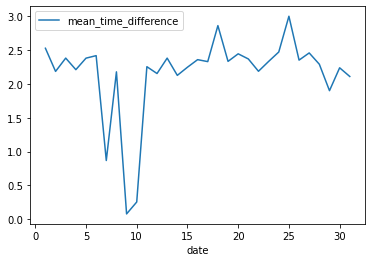

In [1236]:
by_day.plot()

In [1237]:
by_hour = dates.groupby(dates.index.hour).mean()
by_hour

,mean_time_difference
date,
0,3.272769
1,2.940563
2,3.042062
3,2.382992
4,1.893627
5,1.848395
6,1.844707
7,1.954846
8,0.645318


<Figure size 216x288 with 0 Axes>

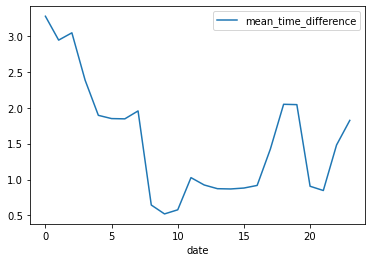

In [1238]:
plt.figure(figsize=(3,4))
by_hour.plot()
plt.show()

In [1239]:
by_year = dates.groupby(dates.index.year).mean()
by_year

,mean_time_difference
date,
2012,10.744994
2013,8.692766
2014,5.138690
2015,2.705800
2016,1.399906
2017,0.044845


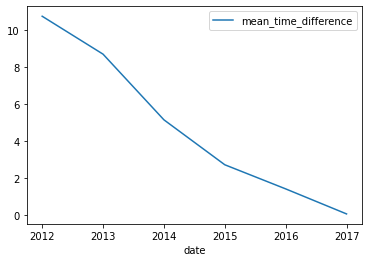

In [1240]:
by_year.plot()

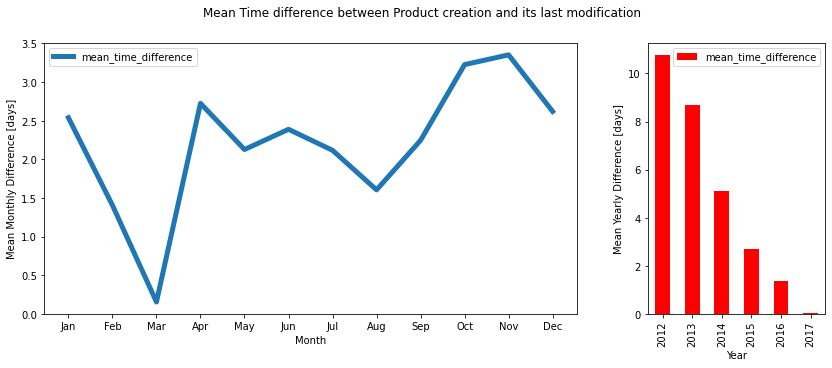

In [1241]:
fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (14,5), gridspec_kw={'width_ratios': [3, 1]})
#by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#monthly_ticks = np.arange(12) # 12 ticks (and they are already equally spaced, so not needed)
# monthly_ticks = 2*np.arange(6) # every two months 
by_month.plot(ax = ax[0], xticks = monthly_ticks, linewidth=5)
by_year.plot(ax = ax[1], kind = 'bar', color = 'red')
fig.suptitle('Mean Time difference between Product creation and its last modification') 
# or plt.suptitle('Main title')
# but not: plt.title("Time difference: Products created vs. Products modified")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Mean Monthly Difference [days]")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Mean Yearly Difference [days]")

plt.show()

In [1242]:
dates.head()

,code,date_modification,datetime_difference,mean_time_difference
date,,,,
2017-03-09 14:32:37,4530,2017-03-09 14:32:37,0 days,0.0
2017-03-09 14:32:37,4559,2017-03-09 14:32:37,0 days,0.0
2017-03-09 10:35:31,16087,2017-03-09 10:35:31,0 days,0.0
2017-03-09 10:34:13,16094,2017-03-09 10:34:13,0 days,0.0
2017-03-09 10:34:11,16100,2017-03-09 10:34:11,0 days,0.0


In [1243]:
downsample = dates[['code']]
downsample.head()

,code
date,
2017-03-09 14:32:37,4530
2017-03-09 14:32:37,4559
2017-03-09 10:35:31,16087
2017-03-09 10:34:13,16094
2017-03-09 10:34:11,16100


Now, I will resample by month (downsampling) in order to get the per month created amount of products

In [1244]:
per_month = downsample.resample('M').count()
per_month.head()

,code
date,
2012-01-31,1
2012-02-29,12
2012-03-31,165
2012-04-30,211
2012-05-31,438


In [1245]:
per_month.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

<Figure size 360x1440 with 0 Axes>

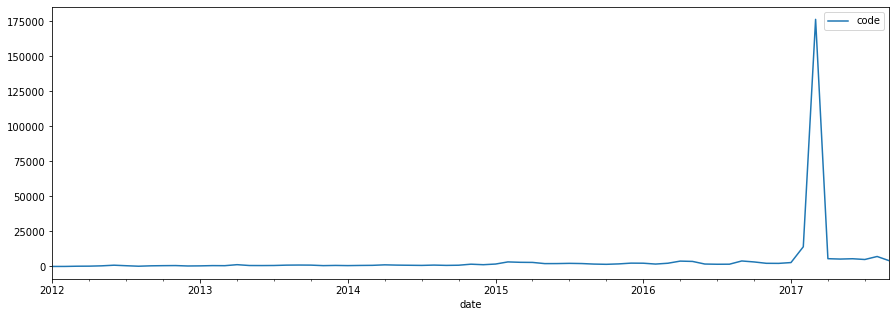

In [1246]:
plt.figure(figsize = (5, 20))
downsample.resample('M').count().plot(figsize = (15,5))
#monthly_ticks = np.arange(7)
plt.show()

It looks like the vast majority of the products were generated in the beginning  2017 (March). I will plot the data before and after this point to see the exact amount of procucts generated. It can be zero or very low compared to this peak so the scale is not appropriate to see these values.

<Figure size 360x1440 with 0 Axes>

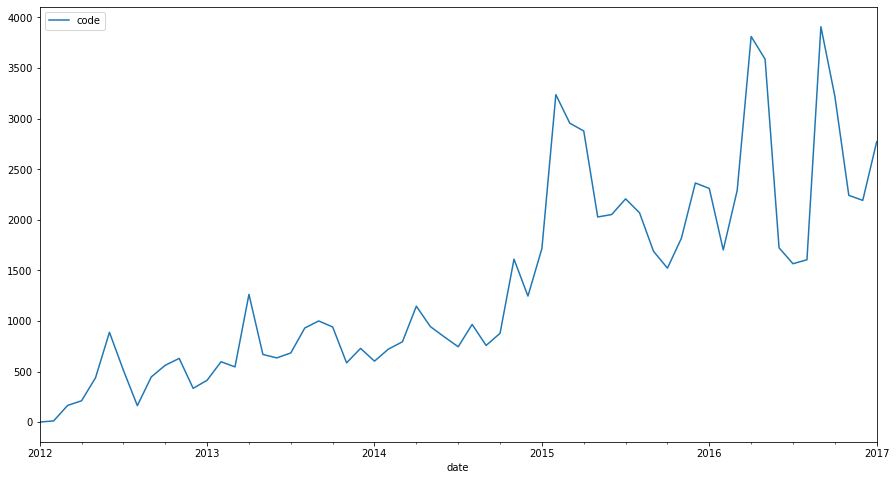

In [1247]:
plt.figure(figsize = (5, 20))
downsample.resample('M').count()[0:61].plot(figsize = (15,8))
#monthly_ticks = np.arange(7)
plt.show()

<Figure size 360x1440 with 0 Axes>

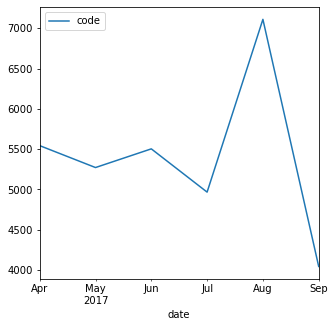

In [1248]:
plt.figure(figsize = (5, 20))
downsample.resample('M').count()[63:69].plot(figsize = (5,5))
#monthly_ticks = np.arange(7)
plt.show()

I have a look at the monthly distribution.

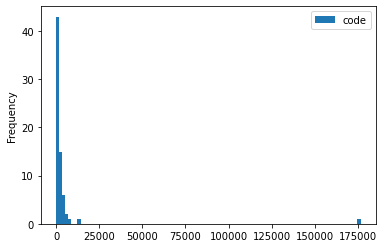

In [1249]:
per_month.plot(kind = 'hist', bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x21245c9a0>]],
      dtype=object)

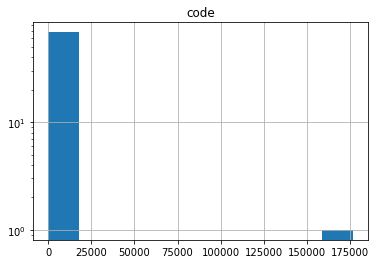

In [1287]:
per_month.hist(log = True)

# E. Build a database
You will build a database to hold your data. It is up to you to define appropriate tables and well as primary keys for connecting them. (The focus is definitely more on just using the basic methods/tools introduced in the course and not on building a complex database.) In particular, you can follow the following list of steps:

 - Restrict your data to 1000 entries and 5 columns of your choice
 - Create a connection to a sqlite3 database
 - Create one or multiple tables, at least one of the tables should have a PRIMARY KEY
 - Fill the database with your data
 - Run at least one query to demonstrate that it works correctly

First of all, I drop all the lines that have at least one missing value and the resulting dataset is called __base__. 

In [1250]:
import sqlite3

In [1251]:
base = food.dropna(how = 'any')

In [1252]:
base.shape

(1102, 28)

The number of rows amounts to about 1000, so this will be my data for this step.

I make the appropriate conversions so that per column only one datatype is available. For the dates I prefer the datetime object.

In [1253]:
r1 = base['created_datetime'].str.extract('(\d\d\d\d-\d\d-\d\d)T(\d\d:\d\d:\d\d)Z')
r2 = base['last_modified_datetime'].str.extract('(\d\d\d\d-\d\d-\d\d)T(\d\d:\d\d:\d\d)Z')
base = base.drop(['created_datetime', 'last_modified_datetime' ,'created_t', 'last_modified_t'], axis = 1)
base['date_creation'] = (r1[0] + " " + r1[1])
base['date_modification'] = (r2[0] + " " +r2[1])

In [1254]:
base['date_creation'].apply(pd.to_datetime)
base['date_modification'].apply(pd.to_datetime)
base.code = base.code.astype(int)
base.additives_n = base.additives_n.astype(int)

In [1255]:
for i in range(base.shape[1]):
    print(i,set(map(type, base.iloc[:,i])), '--------->' , base.columns[i])

0 {<class 'int'>} ---------> code
1 {<class 'str'>} ---------> product_name
2 {<class 'str'>} ---------> countries
3 {<class 'str'>} ---------> ingredients_text
4 {<class 'int'>} ---------> additives_n
5 {<class 'str'>} ---------> additives_en
6 {<class 'str'>} ---------> nutrition_grade
7 {<class 'str'>} ---------> pnns
8 {<class 'float'>} ---------> energy_100g
9 {<class 'float'>} ---------> fat_100g
10 {<class 'float'>} ---------> saturated-fat_100g
11 {<class 'float'>} ---------> trans-fat_100g
12 {<class 'float'>} ---------> cholesterol_100g
13 {<class 'float'>} ---------> carbohydrates_100g
14 {<class 'float'>} ---------> sugars_100g
15 {<class 'float'>} ---------> fiber_100g
16 {<class 'float'>} ---------> proteins_100g
17 {<class 'float'>} ---------> salt_100g
18 {<class 'float'>} ---------> sodium_100g
19 {<class 'float'>} ---------> vitamin-a_100g
20 {<class 'float'>} ---------> vitamin-c_100g
21 {<class 'float'>} ---------> calcium_100g
22 {<class 'float'>} ---------> iron_1

In [1256]:
db = sqlite3.connect('base.sqlite')

I will create a Connection object that will represent the database. This object is created using SQLite’s connect() function.

In [1257]:
conn = sqlite3.connect('openfood.db')
# or conn = sqlite3.connect(r'PATH-TO-YOUR-DIRECTORY/openfood.db')

With this line of code, we’ve created a new connection object, as well as a new file called openfood.db in the directory in my working directory.

I create a variable cur to hold my cursor object which will allow me to run sql queries.

In [1258]:
cursor = conn.cursor()

Now that we have a connection object (conn) and a cursor object (cursor) I can create my first table, which will be called **product**

I follow the steps below:
- I use the execute function on the cursor object I execute a SQL query to generate a table called __product__.
- The IF NOT EXISTS will help when reconnecting to the database. The query will check if the table exists, and if it does, nothing is changed.
- I create five columns: _codeid, product_name, countries, date_creation_ and _data_modification. codeid_ is assigned to be the primary key.
- I committed the changes by using the commit function on the connection object.

In [1259]:
cursor.execute("""CREATE TABLE IF NOT EXISTS product(
                    code INT PRIMARY KEY,
                    product_name TEXT,
                    countries TEXT,
                    date_creation TEXT,
                    date_modification TEXT);
            """)
conn.commit()

I repeat the same process for the rest two table I will create, namelly __additives__ and __nutrigen.

In [1260]:
cursor.execute("""CREATE TABLE IF NOT EXISTS additives(
                    code INT PRIMARY KEY,
                    ingredients_text TEXT,
                    additives_n INT,
                    additives_en TEXT,
                    pnns TEXT
                    );
            """)
conn.commit()

In [1261]:
cursor.execute("""CREATE TABLE IF NOT EXISTS nutrigen(
                    code INT PRIMARY KEY,
                    energy_100g TEXT,
                    sugars_100g FLOAT,
                    salt_100g FLOAT,
                    proteins_100g FLOAT,
                    cholesterol_100g FLOAT,
                    fiber_100g FLOAT,
                    iron_100g FLOAT,
                    nutrition_grade TEXT,
                    nutrition_score_uk FLOAT);
            """)
conn.commit()

In [1262]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

I check to see whether all my three tables are created:

In [1263]:
results = cursor.fetchall()
print(results)

[('product',), ('additives',), ('nutrigen',)]


I create dataframes, subsets of the base dataframe. From these I will get data to the respective tables I just created.

In [1264]:
base_additives = base[['code', 'ingredients_text', 'additives_n', 'additives_en', 'pnns']]
base_product = base[['code','product_name', 'countries', 'date_creation', 'date_modification']]
base_nutrigen = base[['code', 'energy_100g', 'sugars_100g','salt_100g', 'proteins_100g','cholesterol_100g', 'fiber_100g', 'iron_100g','nutrition_grade', 'nutrition-score-uk_100g']]

Now I transfer the data from the above dataframes to the database openfood.db. The column names of the dataframes must be the same as the database table fields defined above. The argument index=False specifies to not include the index of the DataFrame as an actual column in the database, which would be the default setting. I use if_exists='replace' instead of if_exists='append' because ohterwise I get the error: "IntegrityError: UNIQUE constraint failed:" although I delete the database before I run the to_sql().

SQLite and other versions have the REPLACE INTO command inside the database, which replaces all rows where the PRIMARY KEY already exists while inserting all rows with a new PRIMARY KEY. However, this did not seem to work correctly via the to_sql.

In [1265]:
# df2.to_sql(name='customer', con=db, if_exists='append', index=False)

In [1266]:
base_product.to_sql(name='product', con = conn, if_exists='replace', index=False)
base_additives.to_sql(name='additives', con = conn, if_exists='replace', index=False)
base_nutrigen.to_sql(name='nutrigen', con = conn, if_exists='replace', index=False)

In [1267]:
#   query = '''
#   SELECT start_station_name, end_station_name, duration FROM trip 
#   WHERE start_station_name = 'Paseo de San Antonio' 
#   LIMIT 5;
#   '''
#   run_query(query)

In [1268]:
def run_query(query):
    return pd.read_sql_query(query, conn)

I run several queries on this database just to check the first 5 elements of each table I created applying some conditions.

In [1269]:
run_query('''SELECT * FROM product LIMIT 5;''')

,code,product_name,countries,date_creation,date_modification
0,1938067,Chaussons tressés aux pommes,Canada,2017-01-15 17:32:08,2017-01-15 18:29:32
1,8237798,Quiche Lorraine,Canada,2017-04-11 20:41:47,2017-04-11 21:01:28
2,16063,Clam Chowder A Condensed Soup,United States,2017-03-09 13:14:50,2017-03-11 12:14:34
3,36559,Mac 'n Cheese,United States,2015-01-22 15:54:43,2015-07-21 12:43:02
4,8077102146,Hello Panda,United States,2015-08-06 15:52:50,2017-03-09 12:18:54


In [1270]:
run_query('''SELECT * FROM additives LIMIT 5;''')

,code,ingredients_text,additives_n,additives_en,pnns
0,1938067,"ingrédients : pâte (farine, margarines d'huile...",5,"E202 - Potassium sorbate,E211 - Sodium benzoat...",sugary snacks
1,8237798,ingrédients : garniture (substances laitières....,3,"E235 - Natamycin,E316 - Sodium erythorbate,E40...",composite foods
2,16063,"sea clams, sea clam juice, potatoes, wheat flo...",1,E415 - Xanthan gum,composite foods
3,36559,"cooked elbow macaroni (water, enriched semolin...",5,"E101 - Riboflavin,E101i - Riboflavin,E160a - A...",composite foods
4,8077102146,"wheat flour, vegetable shortening (partially h...",2,"E322 - Lecithins,E322i - Lecithin,E500 - Sodiu...",sugary snacks


In [1271]:
run_query('''SELECT * FROM nutrigen LIMIT 5;''')

,code,energy_100g,sugars_100g,salt_100g,proteins_100g,cholesterol_100g,fiber_100g,iron_100g,nutrition_grade,nutrition-score-uk_100g
0,1938067,1090.0,24.700,0.64700,3.33,0.00533,2.000,0.000480,c,9.0
1,8237798,478.0,0.714,0.49900,5.36,0.01070,0.357,0.000643,b,2.0
2,16063,276.0,0.820,1.24968,4.10,0.00800,0.800,0.001180,b,2.0
3,36559,761.0,1.520,0.75700,8.08,0.02020,0.505,0.000727,c,4.0
4,8077102146,2230.0,33.300,0.93100,6.67,0.03330,6.670,0.002400,e,22.0


In [1272]:
run_query("SELECT * FROM product WHERE countries = 'France' ORDER BY product_name DESC LIMIT 5;")

,code,product_name,countries,date_creation,date_modification
0,3265475217002,Vinaigrette Ciboulette & Persil,France,2017-02-09 14:30:09,2017-04-29 06:06:28
1,87666052802,Sriracha Stærk Chili Sauce,France,2015-04-26 07:00:27,2017-03-12 21:03:40
2,16229903534,Soursop Juice,France,2016-01-28 19:02:11,2017-03-19 20:54:01
3,8003475004964,Panettone Classico,France,2017-02-25 11:15:39,2017-02-25 11:28:58
4,697893253264,Palets aux Perles de Chocolat,France,2013-04-10 19:43:45,2015-08-09 17:35:32


In [1273]:
run_query("SELECT DISTINCT pnns FROM additives;")

,pnns
0,sugary snacks
1,composite foods
2,unknown
3,milk and dairy products
4,cereals and potatoes
5,fish meat eggs
6,beverages
7,fruits and vegetables
8,fat and sauces
9,salty snacks


Some more advanced queries follow:

### What is the min and max number of additives per product category?

In [1274]:
run_query('''SELECT pnns, MAX(additives_n) AS max_number_additives, MIN(additives_n) AS min_number_additives  FROM additives GROUP BY pnns;''')

,pnns,max_number_additives,min_number_additives
0,beverages,8,1
1,cereals and potatoes,15,1
2,composite foods,11,1
3,fat and sauces,9,1
4,fish meat eggs,13,1
5,fruits and vegetables,3,1
6,milk and dairy products,6,1
7,salty snacks,7,1
8,sugary snacks,14,1
9,unknown,20,1


### Which American (US) products have sugars and salt greater than 20 and 0.2 per 100g and in which food category (pnns) do they fall?

In [1275]:
run_query('''SELECT additives.pnns, additives.additives_n, product.product_name, product.countries, nutrigen.sugars_100g, nutrigen.salt_100g FROM additives 
                    INNER JOIN product  ON additives.code = product.code
                    INNER JOIN nutrigen ON additives.code = nutrigen.code
                    WHERE product.countries = 'United States'
                    AND nutrigen.sugars_100g > 20
                    AND nutrigen.salt_100g > 2.0
                    ORDER BY nutrigen.salt_100g DESC
                    LIMIT 20
                    ;''')
  #   INNER JOIN nutrigen ON additves.code = nutrigen.code

,pnns,additives_n,product_name,countries,sugars_100g,salt_100g
0,fat and sauces,1,"Sauce, Oyster",United States,22.22,11.99388
1,fat and sauces,2,"Brand, Oyster Sauce",United States,23.33,11.25982
2,fat and sauces,2,Dumpling sauce Hot,United States,26.70,9.14000
3,fat and sauces,1,Oyster Sauce,United States,25.00,7.62000
4,unknown,2,Sweet Sriracha Uncured Bacon Jerky,United States,21.43,5.44322
5,unknown,5,Pistachio,United States,72.00,3.66000
6,unknown,5,Vanilla,United States,76.00,3.56000
7,fat and sauces,2,Ketchup,United States,28.57,3.44678
8,fat and sauces,2,Black Pepper Ketchup,United States,28.57,3.44678
9,fat and sauces,3,Habanero Ketchup Bold & Spicy,United States,28.57,3.44678


### What is the percentage of American products per nutrition grade?

There are many ways to approach this question, I just mention three: the first is with nested subqueries, the second is with anSQL WITH statement and the third is a slight modification of the first one using INNER JOIN statement.

In [1276]:
query = '''SELECT nutrition_grade, CAST(q2.Number AS Double Precision)/CAST(q2.Total AS Double Precision)*100 AS 'Percentage of US products%'
                FROM
                    (SELECT nutrition_grade, count(*) AS Number,
                                        (SELECT count(*) AS Total FROM product WHERE countries = 'United States') AS Total
                            FROM nutrigen
                                 WHERE nutrigen.code in
                                        (SELECT product.code FROM product WHERE countries = 'United States') 
                            GROUP BY nutrition_grade) q2 ;'''
run_query(query)

,nutrition_grade,Percentage of US products%
0,a,10.813704
1,b,19.379015
2,c,20.235546
3,d,25.802998
4,e,23.768737


In [1277]:
query = '''WITH US_Products AS
                (SELECT nutrition_grade, count(*) AS Number,
                                    (SELECT count(*) AS Total FROM product WHERE countries = 'United States') AS Total
                        FROM nutrigen
                             WHERE nutrigen.code in
                                    (SELECT product.code FROM product WHERE countries = 'United States') 
                        GROUP BY nutrition_grade)
                        
            SELECT nutrition_grade, CAST(Number AS Double Precision)/CAST(Total AS Double Precision)*100 AS 'Percentage of US products%'
                FROM US_Products;'''

run_query(query)

# query =''' SELECT code FROM product WHERE countries = 'United States' ;'''
# query = '''SELECT count(*) AS 'Total' FROM product WHERE countries = 'United States' ; '''
#query = '''select nutrition_grade, count(*) AS 'Total' from nutrigen GROUP BY nutrition_grade;'''
# run_query(query)
# select nutrition_grade, count(*) AS 'Total' from nutrigen GROUP BY nutrition_grade;

,nutrition_grade,Percentage of US products%
0,a,10.813704
1,b,19.379015
2,c,20.235546
3,d,25.802998
4,e,23.768737


In [1278]:
query = '''SELECT nutrition_grade, CAST(q2.Number AS Double Precision)/CAST(q2.Total AS Double Precision)*100 AS 'Percentage of US products%'
                FROM
                    (SELECT nutrition_grade, count(*) AS Number,
                            (SELECT count(*) AS Total FROM product WHERE countries = 'United States') AS Total
                                FROM nutrigen
                                INNER JOIN product  ON nutrigen.code = product.code
                                     WHERE product.countries = 'United States'
                                GROUP BY nutrition_grade) q2 ;'''
run_query(query)

,nutrition_grade,Percentage of US products%
0,a,10.813704
1,b,19.379015
2,c,20.235546
3,d,25.802998
4,e,23.768737


# F. Finding correlations
You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.

I select the numerical fields of my previously defined food dataframe and I plot a heatmap of the correlation matrix.

In [1279]:
nutrigens = food._get_numeric_data()

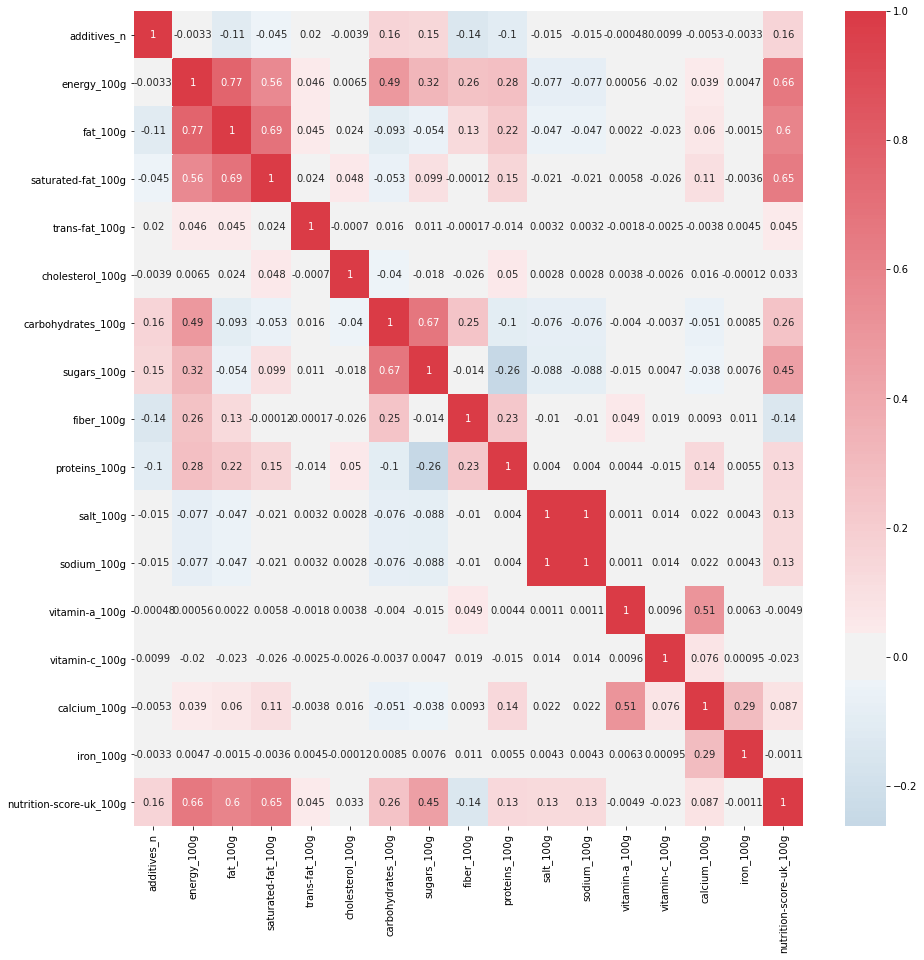

In [1280]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(nutrigens.corr(), annot =True, 
                 cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False)
# sns.heatmap(nutrigens.corr(), annot =True, cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False, ax = ax)

_Question: how do I plot a diagonal heatmap?_

I observe that the energy_100g and saturated-fat_100g and fat_100g are more correlated with the nutrition score (nutritio-score-uk_100g). That means that these variables have a more negative impact on the nutrition score (they increase as the nutrition score increases). On the other hand the cholesterol_100g and vitamins (A, C) and iron_100g seems not to be correlated with the nutrition score while the fiber_100g seems to have a positive effect on the nutrition score. the following conclusions can be also drawn from the following graph.

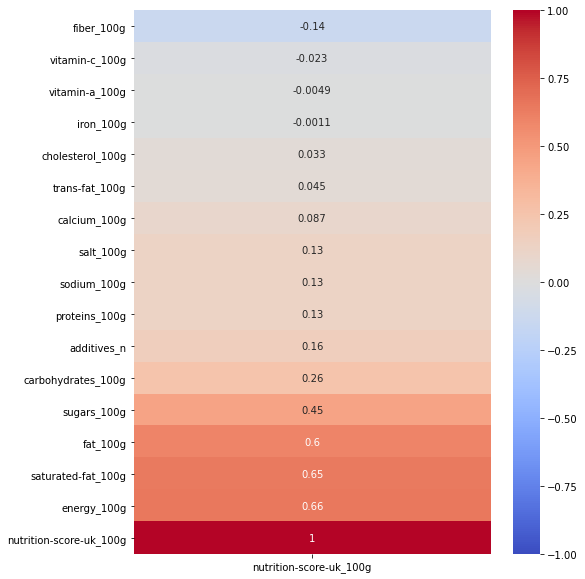

In [1281]:
plt.figure(figsize=(8, 10))
sns.heatmap(nutrigens.corr()[['nutrition-score-uk_100g']].sort_values(by ='nutrition-score-uk_100g'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

/Users/tgdstpej/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


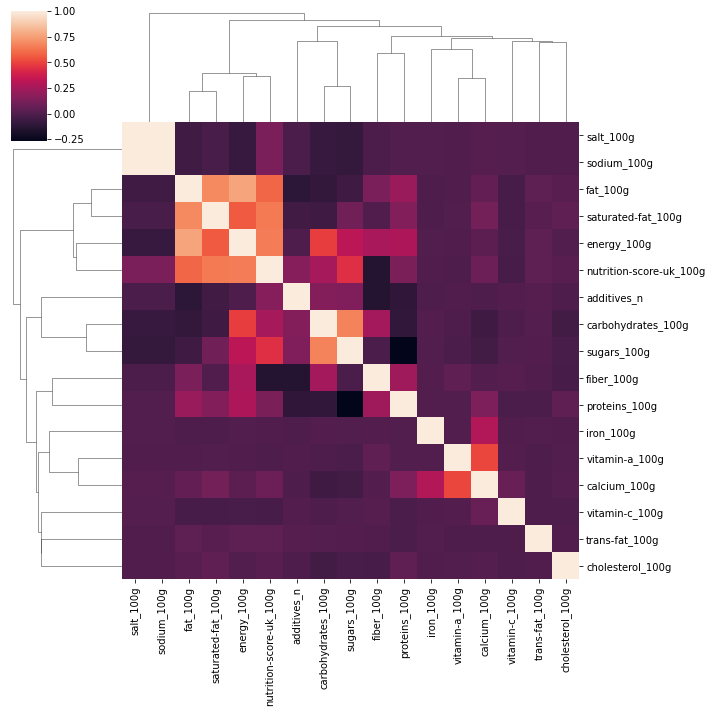

In [1282]:
sns.clustermap(nutrigens.corr(),square=True);

I am not sure I fully understand the cluster map so I would like to discuss it with you.